# Credit Risk Modeling and Risk-Adjusted Capital Allocation in P2P Lending
## Using Machine Learning to Predict Defaults and Maximize Returns on Bondora Data

## Table of Contents
- [1. Executive Summary](#1.-Executive-Summary)
- [2. Introduction](#2.-Introduction)
- [3. Imports and Data Loading](#3.-Imports-and-Data-Loading)
- [4. Initial Data Inspection](#4.-Initial-Data-Inspection)
  - [4.1 Temporal Coverage](#4.1-Temporal-Coverage)
  - [4.2 Dataset Structure and Missingness](#4.2-Dataset-Structure-and-Missingness)
- [5. Target Definition and Credit Risk EDA](#5.-Target-Definition-and-Credit-Risk-EDA)
  - [5.1 Defining the Target Variable](#5.1-Defining-the-Target-Variable)
  - [5.2 Create the Modeling Dataset](#5.2-Create-the-Modeling-Dataset)
  - [5.3 Leakage Control](#5.3-Leakage-Control)
  - [5.4 Credit Risk EDA](#5.4-Credit-Risk-EDA)
    - [5.4.1 Default Risk: New vs. Repeat Borrowers](#5.4.1-Default-Risk:-New-vs.-Repeat-Borrowers)
    - [5.4.2 Default Risk by Loan Duration](#5.4.2-Default-Risk-by-Loan-Duration)
    - [5.4.3 Interest Rate as a Risk Signal](#5.4.3-Interest-Rate-as-a-Risk-Signal)
    - [5.4.4 Credit Rating and Default Risk](#5.4.4-Credit-Rating-and-Default-Risk)
- [6. Exploratory Data Analysis](#6.-Exploratory-Data-Analysis)
  - [6.1 Default Distribution and Temporal Patterns](#6.1-Default-Distribution-and-Temporal-Patterns)
  - [6.2 Credit Rating and Default Risk](#6.2-Credit-Rating-and-Default-Risk)
  - [6.3 Continuous Features vs Default Risk](#6.3-Continuous-Features-vs-Default-Risk)
  - [6.4 Categorical Features and Default Segmentation](#6.4-Categorical-Features-and-Default-Segmentation)
  - [6.5 Platform History and Repeat Borrower Behavior](#6.5-Platform-History-and-Repeat-Borrower-Behavior)
  - [6.6 Feature Correlation and Multicollinearity](#6.6-Feature-Correlation-and-Multicollinearity)
- [7. Feature Engineering and Preprocessing](#7.-Feature-Engineering-and-Preprocessing)
  - [7.1 Handling Missing Values](#7.1-Handling-Missing-Values)
  - [7.2 Categorical Feature Encoding](#7.2-Categorical-Feature-Encoding)
  - [7.3 Feature Selection](#7.3-Feature-Selection)
  - [7.4 Outlier Treatment](#7.4-Outlier-Treatment)
  - [7.5 Feature Transformations](#7.5-Feature-Transformations)
  - [7.6 Train/Test Split (Time-Based)](#7.6-Train/Test-Split-(Time-Based))
  - [7.7 Feature Scaling](#7.7-Feature-Scaling)
- [8. Baseline Model Development](#8.-Baseline-Model-Development)
  - [8.1 Model Training and Class Imbalance Handling](#8.1-Model-Training-and-Class-Imbalance-Handling)
  - [8.2 Model Performance Metrics](#8.2-Model-Performance-Metrics)
  - [8.3 Precision-Recall and ROC Analysis](#8.3-Precision-Recall-and-ROC-Analysis)
  - [8.4 Confusion Matrix Analysis](#8.4-Confusion-Matrix-Analysis)
  - [8.5 Feature Importance Analysis (Logistic Regression Coefficients)](#8.5-Feature-Importance-Analysis-(Logistic-Regression-Coefficients))
  - [8.6 Probability Calibration](#8.6-Probability-Calibration)
  - [8.7 Threshold Selection and Business Trade-offs](#8.7-Threshold-Selection-and-Business-Trade-offs)
  - [8.8 Baseline Logistic Regression Summary](#8.8-Baseline-Logistic-Regression-Summary)
- [9. Advanced Model Development](#9.-Advanced-Model-Development)
  - [9.1 Random Forest Implementation](#9.1-Random-Forest-Implementation)
  - [9.2 XGBoost Implementation](#9.2-XGBoost-Implementation)
  - [9.3 Model Comparison](#9.3-Model-Comparison)
  - [9.4 Feature Importance Analysis (Tree-Based)](#9.4-Feature-Importance-Analysis)
  - [9.5 Ensemble Methods Summary](#9.5-Ensemble-Methods-Summary)
- [10. Business Impact Analysis](#10.-Business-Impact-Analysis)
  - [10.1 Expected Return and Loss Framework](#10.1-Expected-Return-and-Loss-Framework)
  - [10.2 Threshold-Based Capital Allocation Strategies](#10.2-Threshold-Based-Capital-Allocation-Strategies)
  - [10.3 Comparison to Naïve Baseline Strategies](#10.3-Comparison-to-Naïve-Baseline-Strategies)
  - [10.4 Capital-Constrained Portfolio Optimization](#10.4-Capital-Constrained-Portfolio-Optimization)
    - [10.4.1 Approach 1: Ranking by Absolute Expected Value](#10.4.1-Approach-1:-Ranking-by-Absolute-Expected-Value)
    - [10.4.2 Approach 2: Ranking by Expected Value Per Euro (Capital Efficiency)](#10.4.2-Approach-2:-Ranking-by-Expected-Value-Per-Euro-(Capital-Efficiency))
    - [10.4.3 Comparison and Interpretation: Absolute EV vs Capital Efficiency Ranking](#10.4.3-Comparison-and-Interpretation:-Absolute-EV-vs-Capital-Efficiency-Ranking)
  - [10.5 Business Impact Analysis Summary](#10.5-Business-Impact-Analysis-Summary)
- [11. Conclusions and Recommendations](#11.-Conclusions-and-Recommendations)
  - [11.1 Key Findings](#11.1-Key-Findings)
  - [11.2 Model Recommendations](#11.2-Model-Recommendations)
  - [11.3 Limitations](#11.3-Limitations)
  - [11.4 Future Work](#11.4-Future-Work)

## 1. Executive Summary

**Problem and Context**

Peer-to-peer lending platforms require effective credit risk assessment to balance default risk against expected returns. Using ~410,000 historical loans from [Bondora](https://www.kaggle.com/datasets/marcobeyer/bondora-p2p-loans?select=LoanData.csv), originated between 2009 and 2024, this analysis develops a machine learning framework to predict loan defaults and optimize portfolio-level capital allocation strategies for investors operating under capital constraints.

**Approach**

Three modeling approaches were evaluated: logistic regression (interpretable baseline), Random Forest, and XGBoost (ensemble methods). Models were trained on 2012-2021 data and tested on 2022-2024 loans using time-based splitting to prevent data leakage. Predicted default probabilities were integrated with loan terms to calculate expected returns, expected losses, and net expected value per loan. Multiple deployment strategies were compared: threshold-based approval rules, capital-constrained optimization by expected value per euro, and naive baseline strategies.

**Key Findings**

1. **Model Performance:** Ensemble methods achieve 0.72 ROC-AUC and 0.52 Average Precision, representing an 11% improvement in ROC-AUC and a 27% improvement in Average Precision over logistic regression (0.65 AUC, 0.41 AP). Interest rates, credit grades, and loan duration dominate predictions across all model types, validating that loan pricing reflects underlying credit risk.

2. **Business Impact:** Model-driven selection generates 28.52% ROI under threshold-based strategies—more than doubling the 13.71% return of indiscriminate lending. Capital-constrained optimization achieves 60.65% ROI on €25M budgets and 47.64% ROI on €50M budgets by ranking loans by expected value per euro invested, substantially outperforming fixed threshold strategies (30.26% ROI at threshold 0.3).

3. **Deployment Trade-offs:** Conservative thresholds (0.2-0.3) maximize capital efficiency at 25-30% ROI but restrict approvals to 24-39% of applications. Aggressive thresholds (0.5-0.6) maximize volume at 80-90% approval rates but yield lower returns at 18-22% ROI. No single threshold optimizes both efficiency and scale.

4. **Economic Value:** The 11% AUC improvement translates to 15-45 percentage point gains in portfolio-level ROI depending on deployment strategy, generating €1.9-15.1M additional profit across different capital budgets compared to baseline approaches.

**Recommendations**

1. Deploy a hybrid strategy: ensemble models (Random Forest or XGBoost) for portfolio-level risk forecasting and capital reserve calculations where accuracy is paramount; logistic regression for individual credit decisions requiring regulatory transparency and explainability. 

2. For capital allocation, prioritize expected value per euro ranking over fixed probability thresholds when operating under budget constraints (€25-100M range), achieving 47-61% ROI versus 22-30% for threshold-based rules. Conservative lenders should target 0.2-0.3 probability cutoffs for capital preservation; growth-oriented lenders should consider 0.5-0.6 thresholds for volume maximization.

**Limitations**

Results are constrained by three factors:

1. Maturity bias—Test loans are only 0-3 years old with artificially low observed defaults (29% in test vs 55% in training); true model performance likely exceeds reported metrics but cannot be quantified without waiting for loan maturity;

2. Missing external credit data—No FICO scores, payment histories, or bureau information that professional lenders use;

3. Zero-recovery assumptions—Expected value calculations assume no recoveries on defaults, representing a conservative worst-case scenario. Model deployment in new geographies would require local validation given dramatic regional differences in default rates (22-91% across five European markets).

## 2. Introduction

Peer-to-peer (P2P) lending has emerged as an alternative to traditional banking by directly connecting borrowers and investors through online platforms. For investors, P2P lending offers portfolio diversification and the potential for attractive returns through exposure to unsecured consumer credit. At the same time, the absence of collateral makes credit risk the primary determinant of portfolio performance, with loan defaults representing the dominant source of downside risk.

As a result, effective investment and risk management strategies in P2P lending cannot rely solely on minimizing defaults. Higher-risk loans typically offer higher interest rates, and the central analytical challenge is to balance default probability against expected interest income in order to make sound, risk-adjusted capital allocation decisions.

In this project, I develop a credit risk modeling and decision analytics framework using historical loan data from Bondora, a leading European P2P lending platform. The analysis is based on the [Bondora P2P Loans dataset](https://www.kaggle.com/datasets/marcobeyer/bondora-p2p-loans?select=LoanData.csv) from Kaggle, which contains 409,951 loan records originated from February 2009 to May 2024, and includes borrower demographics, financial characteristics, loan terms, credit history, and verification information available at the time of loan origination.

The core of the project is a classification-based approach to estimating loan default probability in a highly imbalanced setting. These probability estimates are then integrated into a simplified expected return and expected loss framework, allowing different loan approval and capital allocation strategies to be evaluated under varying risk appetites. Historical interest rates are treated as fixed inputs rather than pricing decisions, reflecting a focus on credit risk assessment and loan selection rather than interest rate optimization.

The analysis is structured around three key questions:

**1. Credit Risk Modeling:** Which borrower and loan characteristics are most predictive of default, and how effectively can classification models estimate default risk in an imbalanced P2P lending environment?

**2. Risk-Adjusted Returns:** How can predicted default probabilities be combined with contractual loan terms to estimate expected returns and losses at the individual-loan level?

**3. Capital Allocation Decisions:** Given limited capital, how do different approval thresholds and risk bands affect portfolio-level default rates, expected losses, and returns, and how do these outcomes compare to naïve investment strategies?

By combining interpretable machine learning models with decision-focused evaluation metrics such as expected loss and approval-rate trade-offs, this project demonstrates how credit risk analytics can be translated into practical, risk-aware capital allocation decisions, directly applicable to fintech lending and consumer credit risk management.

## 3. Imports and Data Loading

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

In [2]:
# Load raw Bondora dataset
df = pd.read_csv('LoanData.csv', low_memory=False)

print(f"Original dataset: {df.shape[0]:,} loans, {df.shape[1]} features")

Original dataset: 409,951 loans, 97 features


This project uses the original Bondora loan-level dataset `(LoanData.csv)`, which contains both origination characteristics and post-origination loan performance information. The dataset includes 409,951 loans and 97 variables spanning borrower demographics, loan terms, credit history, and loan outcomes.

## 4. Initial Data Inspection

The purpose of this section is to understand the structure, time coverage, and data quality without defining the modeling target yet.

### 4.1 Temporal Coverage

In [3]:
# Check temporal coverage
df['LoanDate'] = pd.to_datetime(df['LoanDate'], errors='coerce')

print(f"Loan origination period: {df['LoanDate'].min().date()} to {df['LoanDate'].max().date()}")
print(f"Time span: {(df['LoanDate'].max() - df['LoanDate'].min()).days / 365.25:.1f} years")

Loan origination period: 2009-02-28 to 2024-05-24
Time span: 15.2 years


Loans span 15 years, covering multiple economic cycles and regulatory environments. This temporal breadth is representative of real-world credit portfolios and motivates careful handling of time-dependent effects in later modeling stages.

### 4.2 Dataset Structure and Missingness

In [4]:
# Display dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409951 entries, 0 to 409950
Data columns (total 97 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   LoanId                                  409951 non-null  object        
 1   LoanNumber                              409951 non-null  int64         
 2   ListedOnUTC                             409951 non-null  object        
 3   BiddingStartedOn                        409951 non-null  object        
 4   BidsPortfolioManager                    409951 non-null  float64       
 5   BidsApi                                 409951 non-null  float64       
 6   BidsManual                              409951 non-null  float64       
 7   NewCreditCustomer                       409951 non-null  bool          
 8   LoanApplicationStartedDate              409951 non-null  object        
 9   LoanDate                             

In [5]:
# Data quality check
df.isnull().sum()

LoanId                                      0
LoanNumber                                  0
ListedOnUTC                                 0
BiddingStartedOn                            0
BidsPortfolioManager                        0
                                        ...  
PrincipalDebtServicingCost             295395
InterestAndPenaltyDebtServicingCost    295395
ActiveLateLastPaymentCategory          258090
LoanCancelled                          389970
PreviousEarlyRepaymentsBeforeLoan      346613
Length: 97, dtype: int64

In [6]:
df.isnull().mean().sort_values(ascending=False).head(10)

CreditScoreEsEquifaxRisk             0.970194
LoanCancelled                        0.951260
PlannedPrincipalTillDate             0.867145
PreviousEarlyRepaymentsBeforeLoan    0.845499
GracePeriodEnd                       0.749973
GracePeriodStart                     0.749973
ContractEndDate                      0.748721
InterestAndPenaltyWriteOffs          0.720562
PrincipalWriteOffs                   0.720562
PrincipalDebtServicingCost           0.720562
dtype: float64

The dataset contains a mix of numeric, boolean, and encoded categorical variables. Missingness is concentrated in post-origination and repayment-related fields, which are intentionally excluded from modeling to prevent target leakage.

In [7]:
# Descriptive statistics
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,LoanDate,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,PreviousEarlyRepaymentsBeforeLoan
count,4.099510e+05,409951.000000,409951.000000,409951.000000,389970,409951.000000,409951.000000,409901.000000,409951.000000,409951.000000,...,174042.000000,409487.000000,409487.000000,254011.000000,409484.000000,226468.000000,226468.000000,114556.000000,114556.000000,63338.000000
mean,2.547415e+06,371.560060,14.045726,237.617593,2021-02-06 15:56:20.216939520,13.440897,3.977417,3.552833,3.470373,40.313133,...,939.213745,1.978068,3842.733372,1186.337632,0.048879,5.287330,72.678895,16.964804,288.943697,566.651555
min,3.700000e+01,0.000000,0.000000,0.000000,2009-02-28 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.346386e+06,0.000000,0.000000,0.000000,2019-07-17 00:00:00,10.000000,2.000000,4.000000,1.000000,31.000000,...,0.000000,0.000000,0.000000,142.790000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000
50%,2.496849e+06,52.000000,0.000000,28.000000,2021-10-29 00:00:00,13.000000,4.000000,4.000000,4.000000,39.000000,...,0.000000,1.000000,1169.000000,521.490000,0.000000,2.000000,60.000000,0.000000,80.235000,0.000000
75%,3.769763e+06,278.000000,2.000000,213.000000,2023-03-30 00:00:00,17.000000,5.000000,4.000000,4.000000,49.000000,...,523.745000,3.000000,5738.000000,1302.315000,0.000000,7.000000,115.000000,0.000000,357.712500,0.000000
max,4.861981e+06,10625.000000,7570.000000,10631.000000,2024-05-24 00:00:00,23.000000,7.000000,4.000000,22.000000,77.000000,...,78982.070000,86.000000,119983.000000,34077.420000,19.000000,60.000000,141.000000,3325.330000,7180.720000,48977.000000
std,1.363552e+06,903.791402,99.070530,542.391115,NaN,5.005922,1.806247,1.042450,3.097541,12.170074,...,2965.990982,3.193008,5655.089802,1895.583476,0.347293,7.908551,33.246074,104.849346,491.935770,1985.673076


Interest rates range from 2% to 264.31%, with a median of 20.07% and a mean of 26.62%. The mean exceeding the median indicates a right-skewed distribution with a long tail of high-risk loans priced at extreme interest rates, likely reflecting higher perceived credit risk. The interquartile range (18.86%–31.35%) shows that most loans cluster within a relatively narrow band, although significant outliers exist.

The average borrower is 40.3 years old. Median monthly income is €1,700, 24% below the mean (€2,174), indicating right skew due to high-income outliers. Borrowers typically have 2 existing liabilities (median), with median total liabilities of €240. Extreme values in income (up to €1,012,019 per month) and liabilities (up to €12.4 million) may reflect data entry errors, non-typical borrowers, or reporting artifacts. These outliers, representing fewer than 0.1% of records based on the 75th percentile position, will be examined for patterns and capped or excluded if they represent data quality issues rather than legitimate extreme cases.

Median loan size is €2,080 for approved amounts, with an average applied amount of €2,557 exceeding average approved amount of €2,489, suggesting partial approvals in some cases. Loan terms are predominantly 60 months (median and 75th percentile), with loan amounts ranging from €6.39 to €15,948.

Borrowers have an average of 2.0 previous loans with Bondora, with average cumulative previous borrowing of €1,169. Early repayments are rare (median and 75th percentile equal to zero), making this feature potentially useful for identifying low-risk borrowers.

## 5 Target Definition and Credit Risk EDA

This section establishes the foundation for all subsequent modeling: defining the target variable, filtering to known outcomes, and conducting credit risk-focused exploratory data analysis.

### 5.1 Defining the Target Variable

The objective of this project is to model credit default risk at loan origination. To ensure a clean and unambiguous target definition, default is defined using Bondora's explicit default indicator.

**Default Definition:**

- `is_default = 1` if the loan has a recorded `DefaultDate` (indicating Bondora formally declared a credit event)
- `is_default = 0` if no default date exists (loan never entered default status)
- Loans with `Status = "Current"` are excluded, as their final outcomes are not yet observed (right-censored observations)

This event-based definition captures all credit risk failures, including loans that later recovered through collections or restructuring. It aligns with industry-standard credit risk measurement, where default is treated as a point-in-time event rather than a terminal state.

### 5.2 Create the Modeling Dataset

In [8]:
# Select only features available at loan origination
origination_features = [
    'LoanId', 'LoanDate', 'Age', 'Gender', 'Country', 'Education', 
    'EmploymentDurationCurrentEmployer', 'HomeOwnershipType',
    'IncomeTotal', 'DebtToIncome', 'FreeCash',
    'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
    'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'Rating',
    'NewCreditCustomer', 'NoOfPreviousLoansBeforeLoan',
    'AmountOfPreviousLoansBeforeLoan', 'PreviousEarlyRepaymentsCountBeforeLoan',
    'VerificationType', 'Status'
]

# Keep only loans with known outcomes (exclude "Current")
df_model = df[df['Status'].isin(['Repaid', 'Late'])].copy()

# Create binary target from raw df (before filtering columns)
df_model['is_default'] = df_model['DefaultDate'].notna().astype(int)

# Select origination features + target
df_model = df_model[origination_features + ['is_default']].copy()

# Verify
print(f"Modeling dataset size: {df_model.shape[0]:,}")
print(f"Features: {len(origination_features)}")
print(f"Default rate: {df_model['is_default'].mean():.2%}")
print("\nClass distribution:")
print(df_model['is_default'].value_counts())

# Validate breakdown by original Status (before it was dropped)
print("\nBreakdown by Status and Default:")
temp_check = df[df['Status'].isin(['Repaid', 'Late'])].copy()
temp_check['is_default'] = df.loc[temp_check.index, 'DefaultDate'].notna().astype(int)
temp_check.groupby(['Status', 'is_default']).size().unstack(fill_value=0)

Modeling dataset size: 266,482
Features: 25
Default rate: 46.47%

Class distribution:
is_default
0    142638
1    123844
Name: count, dtype: int64

Breakdown by Status and Default:


is_default,0,1
Status,,
Late,21858,87266
Repaid,120780,36578


Default is defined as any loan with a recorded `DefaultDate`, regardless of subsequent recovery status. This definition captures all credit events where Bondora formally declared a loan non-performing, including:

- Loans that remain in "Late" status (87,266 loans)
- Loans that eventually reached "Repaid" status after a default event (36,578 loans)

This approach treats default as an event-based outcome (did a credit event occur?) rather than a terminal state (what was the final status?). In practice, a loan that defaults and later recovers still represents a credit risk failure at the point of default, even if subsequent collections efforts are successful.

Loans with `Status = "Current"` (143,469) are excluded as right-censored observations—their final outcomes are unknown at the data extraction date.

Resulting Class Distribution:

- Non-default: 142,638 loans (53.5%) - No default event occurred
- Default: 123,844 loans (46.5%) - Default event occurred (whether or not later recovered)

A 46.5% default rate is elevated but realistic for P2P platforms serving subprime and near-prime borrowers, particularly during economic stress periods (2015-2020 European P2P lending crisis).

### 5.3 Leakage Control

To prevent target leakage, all post-origination variables were explicitly excluded from the modeling feature set. This includes repayment and recovery variables, write-offs and balances, internal model outputs (e.g., ProbabilityOfDefault, ExpectedLoss), and all other variables updated after loan origination. Only information available at the time of loan approval is used for model training.

### 5.4 Credit Risk EDA

This section explores how key borrower and loan characteristics relate to default risk. All analysis is conducted relative to the defined default target, rather than as standalone distributions.

### 5.4.1 Default Risk: New vs. Repeat Borrowers

In [9]:
# Default rate by new vs repeat borrower
df_model.groupby('NewCreditCustomer')['is_default'].mean()

NewCreditCustomer
False    0.435162
True     0.487195
Name: is_default, dtype: float64

First-time borrowers (41.8% default rate) exhibit a modestly higher default rate than repeat borrowers (39.8% default rate). This is consistent with credit risk theory: borrowers with prior successful repayment history on the platform provide additional information that reduces uncertainty. While the difference is not large, it suggests platform tenure contains incremental predictive signal.

### 5.4.2 Default Risk by Loan Duration

In [10]:
# Default rate by loan duration
df_model.groupby('LoanDuration')['is_default'].mean().head()

LoanDuration
1    0.163842
2    0.318182
3    0.086756
4    0.370370
5    0.500000
Name: is_default, dtype: float64

Short-duration loans show low or zero observed default rates, reflecting both limited exposure time and smaller loan sizes. As loan duration increases, default risk rises, consistent with greater uncertainty and cumulative exposure over longer horizons. Loan term is therefore a structurally important risk driver.

Note: Sparse observations at very short durations explain zero default rates for some terms.

### 5.4.3 Interest Rate as a Risk Signal

In [11]:
# Interest vs default (binned)
df_model['interest_bin'] = pd.qcut(df_model['Interest'], 10)
df_model.groupby('interest_bin')['is_default'].mean()

interest_bin
(1.999, 15.45]      0.361681
(15.45, 18.74]      0.307133
(18.74, 19.86]      0.242511
(19.86, 20.68]      0.307455
(20.68, 21.86]      0.402248
(21.86, 28.0]       0.482221
(28.0, 33.15]       0.570135
(33.15, 38.01]      0.574826
(38.01, 51.269]     0.633920
(51.269, 264.31]    0.776952
Name: is_default, dtype: float64

Default rates generally increase across interest rate deciles, indicating that higher interest rates partially reflect underlying borrower risk. However, the relationship is not perfectly monotonic, suggesting that pricing alone does not fully capture credit risk. This motivates multivariate modeling to disentangle borrower characteristics, loan terms, and pricing effects.

### 5.4.4 Credit Rating and Default Risk

In [12]:
# Encoded categorical example
df_model.groupby('Rating')['is_default'].mean()

Rating
A     0.333498
AA    0.282499
B     0.292125
C     0.359092
D     0.459989
E     0.607334
F     0.733515
HR    0.773453
Name: is_default, dtype: float64

Bondora’s internal credit rating exhibits strong monotonic separation in default risk, with default rates increasing steadily from high-grade (AA, A) to low-grade (F, HR) loans. This confirms that the platform’s rating system contains meaningful credit information and serves as a strong benchmark feature for subsequent modeling.

## 6. Exploratory Data Analysis

Before feature engineering and modeling, we examine default patterns across key dimensions to understand risk segmentation, identify predictive signals, and validate data quality. This analysis informs feature selection, guides preprocessing decisions, and establishes baseline expectations for model performance.

### 6.1 Default Distribution and Temporal Patterns

Before model development, it is essential to understand the prevalence of default and how default behavior evolves over time. This analysis informs both modeling strategy (class imbalance handling) and validation design (time-aware train–test splitting).

In [13]:
# Overall default rate
print(f"Overall Default Rate: {df_model['is_default'].mean():.2%}")

# Default rate over time
df_model['LoanYear'] = pd.to_datetime(df_model['LoanDate']).dt.year
yearly_default = df_model.groupby('LoanYear')['is_default'].agg(['mean', 'count'])

print("\nDefault Rate by Year:")
print(yearly_default)

Overall Default Rate: 46.47%

Default Rate by Year:
              mean  count
LoanYear                 
2009.0    0.389474    665
2010.0    0.377701   1157
2011.0    0.277162    451
2012.0    0.210066    457
2013.0    0.356142   2499
2014.0    0.555346   7408
2015.0    0.617992   7937
2016.0    0.618507  10299
2017.0    0.636290  17184
2018.0    0.587303  23155
2019.0    0.619903  50524
2020.0    0.506605  22860
2021.0    0.410928  38160
2022.0    0.386905  40793
2023.0    0.219918  34913
2024.0    0.013804   5216


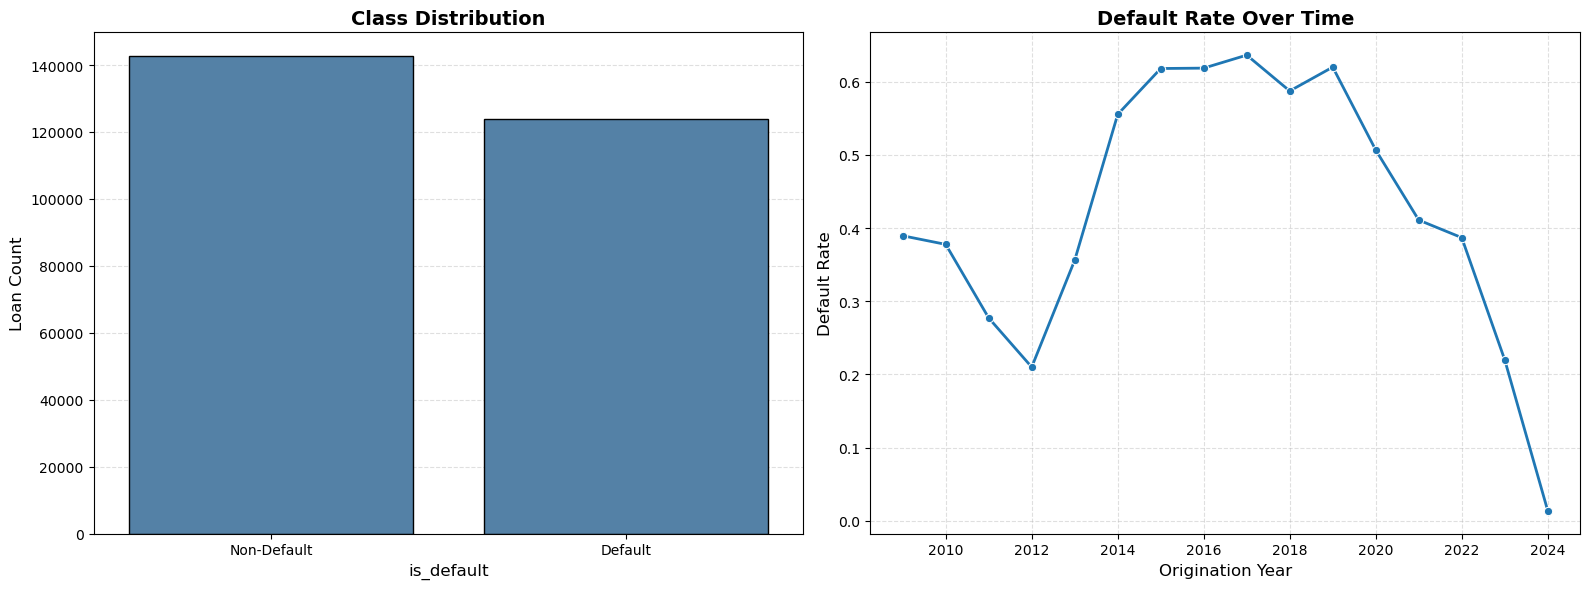

In [14]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Class balance
sns.barplot(
    x=df_model['is_default'].value_counts().index,
    y=df_model['is_default'].value_counts().values,
    ax=axes[0],
    edgecolor='black',
    color='steelblue'
)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Default', 'Default'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('is_default', fontsize=12)
axes[0].set_ylabel('Loan Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.4, ls='--')
axes[0].set_axisbelow(True)

# Time trend
sns.lineplot(
    x=yearly_default.index,
    y=yearly_default['mean'],
    marker='o',
    linewidth=2,
    ax=axes[1]
)
axes[1].set_title('Default Rate Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Default Rate', fontsize=12)
axes[1].set_xlabel('Origination Year', fontsize=12)
axes[1].grid(True, alpha=0.4, ls='--')

plt.tight_layout()
plt.show()

The overall default rate is approximately 46%, representing 123,844 defaults among 266,482 known-outcome loans. This confirms that the dataset represents a high-risk, non-prime lending environment. While the class distribution is not severely imbalanced, the minority class is large enough to materially affect model training and evaluation, motivating the use of class-aware techniques and precision–recall–based metrics.

The temporal analysis reveals significant variation in default rates across loan vintages. Default rates peak during 2013-2019 at approximately 60%, likely reflecting the European P2P lending crisis and economic stress during this period. The sharp decline in default rates for 2022-2024 vintages (dropping to 1.4% for 2024) does **not** represent improved credit quality—rather, it reflects **maturity bias**: recent loans have not had sufficient time to enter default. Loans originated in 2024 have had less than 12 months of performance history, making their observed default rates artificially low and unsuitable for model training without time-based adjustments.

This temporal structure motivates a time-based train–test split, ensuring that models are evaluated on future-originating loans rather than randomly mixed observations. Such a setup better reflects real-world deployment, where credit models are trained on historical data and applied prospectively.

### 6.2 Credit Rating and Default Risk

Credit ratings represent Bondora’s internal assessment of borrower credit quality at origination and serve as the platform’s primary risk segmentation tool. Examining default rates across rating categories provides a benchmark for model performance and establishes a baseline level of risk discrimination that any predictive model must exceed to be practically useful.

In [15]:
# Default rate by rating
rating_default = df_model.groupby('Rating')['is_default'].agg(['mean', 'count']).sort_index()
print("Default Rate by Credit Rating:")
print(rating_default)

Default Rate by Credit Rating:
            mean  count
Rating                 
A       0.333498  10147
AA      0.282499   7154
B       0.292125  34208
C       0.359092  74304
D       0.459989  59358
E       0.607334  37090
F       0.733515  26767
HR      0.773453  14721


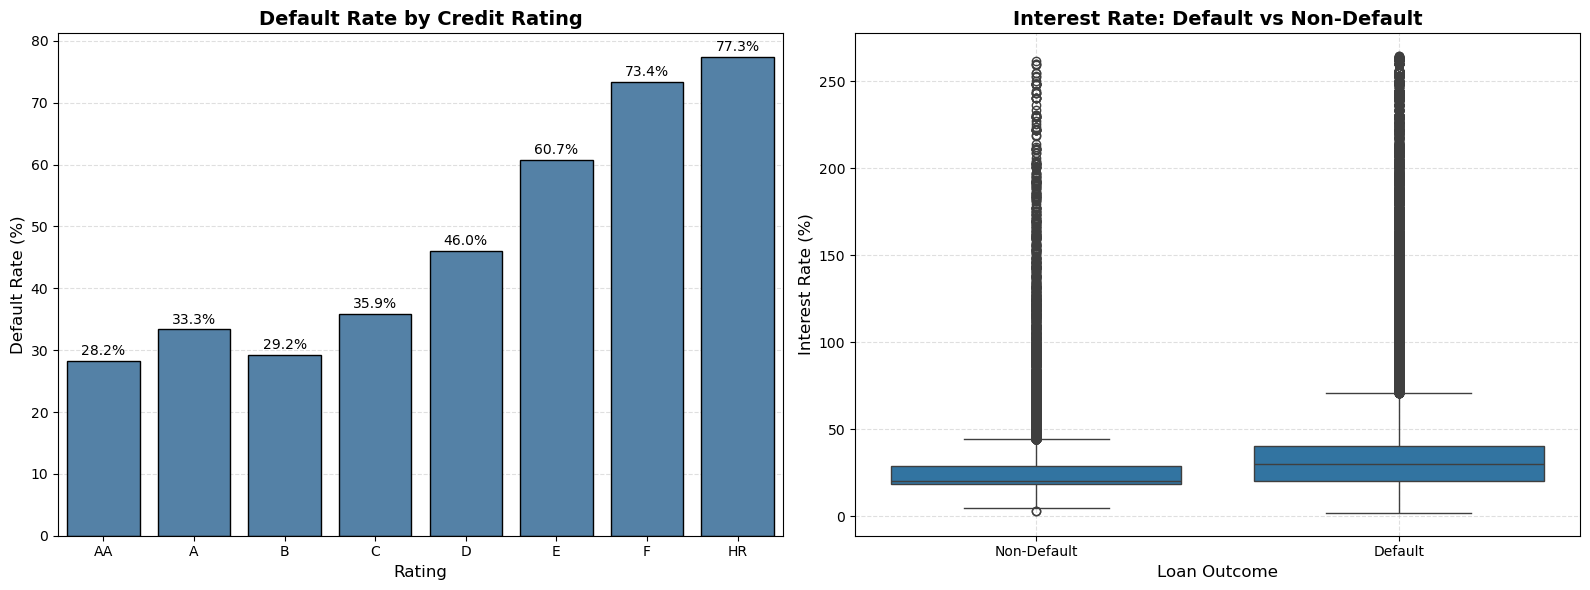

In [16]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean interest by credit rating
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'F', 'HR']
default_rates = df_model.groupby('Rating')['is_default'].mean().reindex(rating_order)
sns.barplot(x=default_rates.index, y=(default_rates.values)*100, ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Default Rate by Credit Rating', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Default Rate (%)', fontsize=12)
axes[0].grid(axis='y', ls='--', alpha=0.4)
axes[0].set_axisbelow(True)

# Add values on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', padding=2)

# Distribution comparison
sns.boxplot(data=df_model, x='is_default', y='Interest', ax=axes[1])
axes[1].set_title('Interest Rate: Default vs Non-Default', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loan Outcome', fontsize=12)
axes[1].set_ylabel('Interest Rate (%)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-Default', 'Default'])
axes[1].grid(True, ls="--", alpha=0.4)

plt.tight_layout()
plt.show()

Bondora’s internal credit rating exhibits strong monotonic separation in default risk, with default rates increasing sharply from investment-grade (AA/A) to high-risk (F/HR) loans. This confirms that the platform’s rating system encodes substantial credit information and serves as a strong baseline benchmark for model performance. Any predictive model must therefore demonstrate incremental value beyond this rating to justify its use.

The right panel reveals an important pricing dynamic: defaulted loans show systematically higher interest rates (median ~30%) compared to non-defaulted loans (median ~20%), confirming that Bondora's pricing mechanism incorporates credit risk assessment. However, the substantial overlap in distributions suggests that interest rate alone is an imperfect risk proxy—many high-rate loans successfully repay, while some low-rate loans default. This validates the need for multivariate modeling to improve upon single-feature risk segmentation.

### 6.3 Continuous Features vs Default Risk

This section examines how key continuous borrower and loan characteristics differ between defaulted and non-defaulted loans. While credit Rating provides strong risk segmentation, continuous features capture granular variation within rating bands and may reveal nonlinear risk patterns not fully captured by categorical classifications.

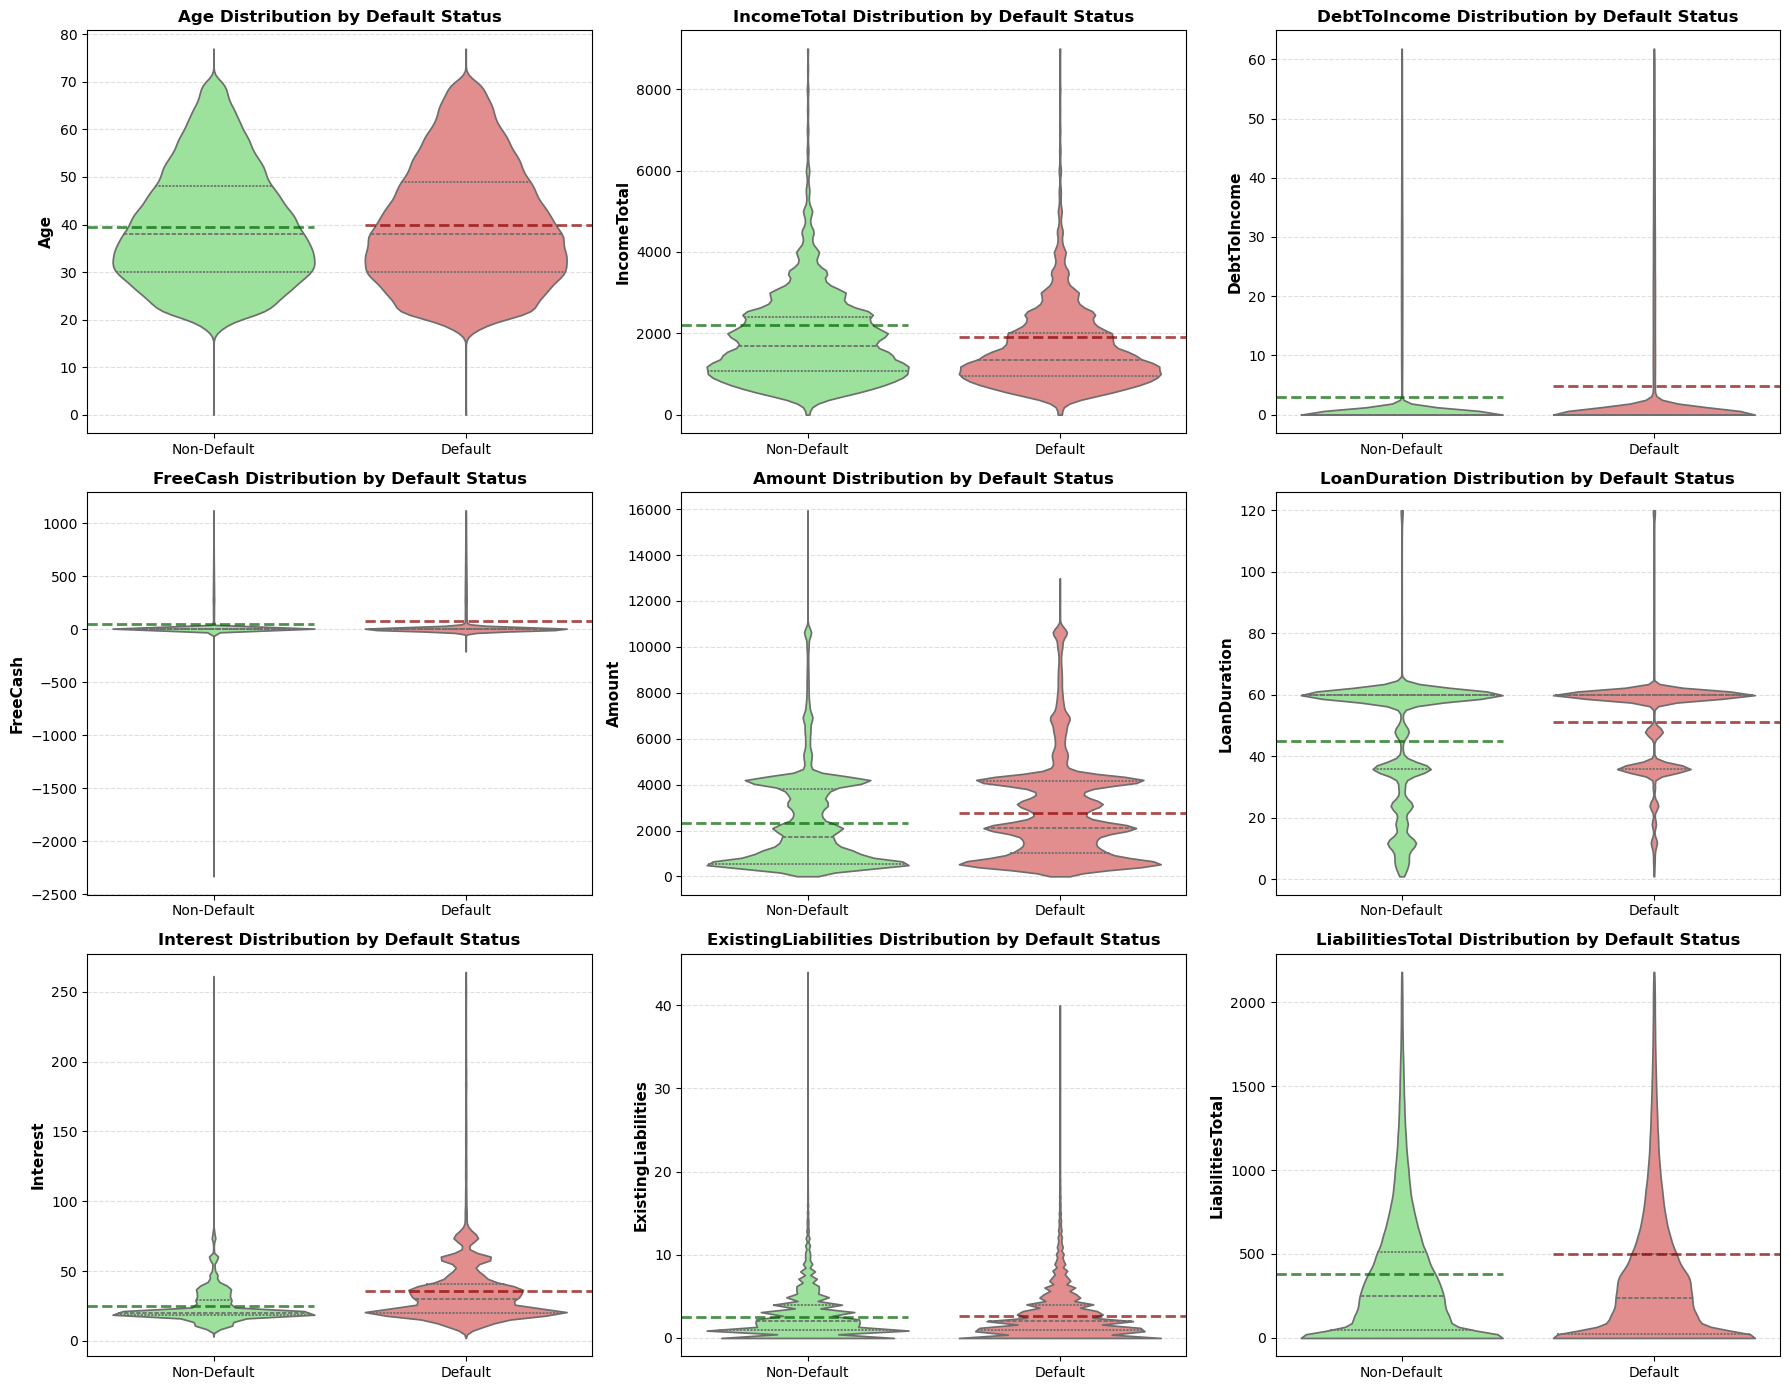

In [17]:
### Distribution comparison of default vs non-default

# Select key continuous features
continuous_features = [
    'Age', 'IncomeTotal', 'DebtToIncome', 'FreeCash',
    'Amount', 'LoanDuration', 'Interest',
    'ExistingLiabilities', 'LiabilitiesTotal'
]

# Create comparison plots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    # For highly skewed features, cap at 99th percentile for visualization
    if feature in ['DebtToIncome', 'FreeCash', 'LiabilitiesTotal', 'IncomeTotal']:
        plot_data = df_model[df_model[feature] <= df_model[feature].quantile(0.99)].copy()
    else:
        plot_data = df_model.copy()
    
    # Violin plots
    sns.violinplot(
        data=plot_data,
        x='is_default',
        y=feature,
        ax=axes[idx],
        inner='quartile',  # Shows quartiles inside violin
        cut=0,  # Don't extend beyond data range
        palette=['lightgreen', 'lightcoral']
    )
    
    # Calculate means for annotation
    mean_non_default = df_model[df_model['is_default'] == 0][feature].mean()
    mean_default = df_model[df_model['is_default'] == 1][feature].mean()
    
    # Add mean markers
    axes[idx].axhline(mean_non_default, xmin=0, xmax=0.45, 
                     color='darkgreen', linestyle='--', linewidth=2, alpha=0.7)
    axes[idx].axhline(mean_default, xmin=0.55, xmax=1, 
                     color='darkred', linestyle='--', linewidth=2, alpha=0.7)
    
    # Formatting
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{feature} Distribution by Default Status', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Non-Default', 'Default'], fontsize=10)
    axes[idx].grid(axis='y', alpha=0.4, linestyle='--')
    axes[idx].set_axisbelow(True)

plt.tight_layout()
plt.show()

In [18]:
# Statistical summary table
summary = []
for feature in continuous_features:
    non_default_mean = df_model[df_model['is_default'] == 0][feature].mean()
    default_mean = df_model[df_model['is_default'] == 1][feature].mean()
    diff_pct = ((default_mean - non_default_mean) / non_default_mean) * 100
    
    summary.append([
        feature,
        non_default_mean,
        default_mean,
        diff_pct
    ])

summary_df = pd.DataFrame(
    summary,
    columns=['Feature', 'Non-Default Mean', 'Default Mean', 'Difference (%)']
)
# Display with color gradient
summary_df.style.format({
    'Non-Default Mean': '{:.2f}',
    'Default Mean': '{:.2f}',
    'Difference (%)': '{:+.2f}%'
}).background_gradient(subset=['Difference (%)'], cmap='RdYlGn_r')

,Feature,Non-Default Mean,Default Mean,Difference (%)
0,Age,39.48,39.87,+1.01%
1,IncomeTotal,2195.46,1910.88,-12.96%
2,DebtToIncome,2.92,4.90,+67.66%
3,FreeCash,46.01,78.05,+69.64%
4,Amount,2328.60,2747.15,+17.97%
5,LoanDuration,45.13,51.15,+13.34%
6,Interest,24.93,35.55,+42.59%
7,ExistingLiabilities,2.54,2.62,+2.98%
8,LiabilitiesTotal,380.98,499.74,+31.17%


**Interpretation note:** Color intensity reflects relative magnitude of differences between defaulted and non-defaulted loans; red indicates higher values among defaulted loans, while green indicates lower values.

Continuous features reveal systematic but modest directional differences between defaulted and non-defaulted loans. Defaulted borrowers are marginally older (39.9 vs 39.5 years, +1%), a negligible difference with no practical significance. Income shows weak separation, with defaulted borrowers earning 13% less on average (€1,911 vs €2,195), suggesting income stability provides measurable but limited protection against default.

The strongest continuous risk signals emerge from debt burden metrics. **DebtToIncome ratios are 68% higher among defaulted loans** (4.9 vs 2.9), confirming debt service capacity as a primary structural risk driver. Paradoxically, FreeCash—intended to measure residual income after debt service—shows 70% higher values for defaulted borrowers (€78 vs €46), likely reflecting data quality issues or reporting artifacts rather than genuine financial cushion. Total liabilities are 31% higher among defaulted borrowers (€500 vs €381), while the raw count of existing liabilities shows near-identical means (2.6 vs 2.5), indicating that absolute debt burden matters more than the number of separate obligations.

Loan structure variables demonstrate consistent directional patterns. Defaulted loans are 18% larger in principal (€2,747 vs €2,329), have 13% longer terms (51 vs 45 months), and carry **43% higher interest rates** (35.6% vs 24.9%). The substantial interest rate differential confirms that Bondora's pricing mechanism incorporates risk assessment, yet the persistence of high default rates among high-interest loans indicates that pricing alone does not fully prevent credit losses.

Despite these directional differences, **distributions overlap substantially across all features**—no single continuous variable provides sufficient separation to reliably discriminate default in isolation. DebtToIncome and Interest emerge as the strongest standalone signals (68% and 43% differences respectively), while Age and ExistingLiabilities show minimal discriminatory power (<3% differences). This pattern motivates multivariate modeling approaches that combine borrower capacity, debt burden, loan structure, and pricing signals to achieve robust default prediction. Features with extreme skewness (IncomeTotal, LiabilitiesTotal) will likely require log transformation or capping during preprocessing, as evidenced by the compressed distributions in the capped visualizations above.

### 6.4 Categorical Features and Default Segmentation

Categorical features capture demographic, geographic, and verification-related borrower characteristics. This section examines default rate variation across categories to identify meaningful risk segments and assess the discriminatory power of non-continuous predictors.

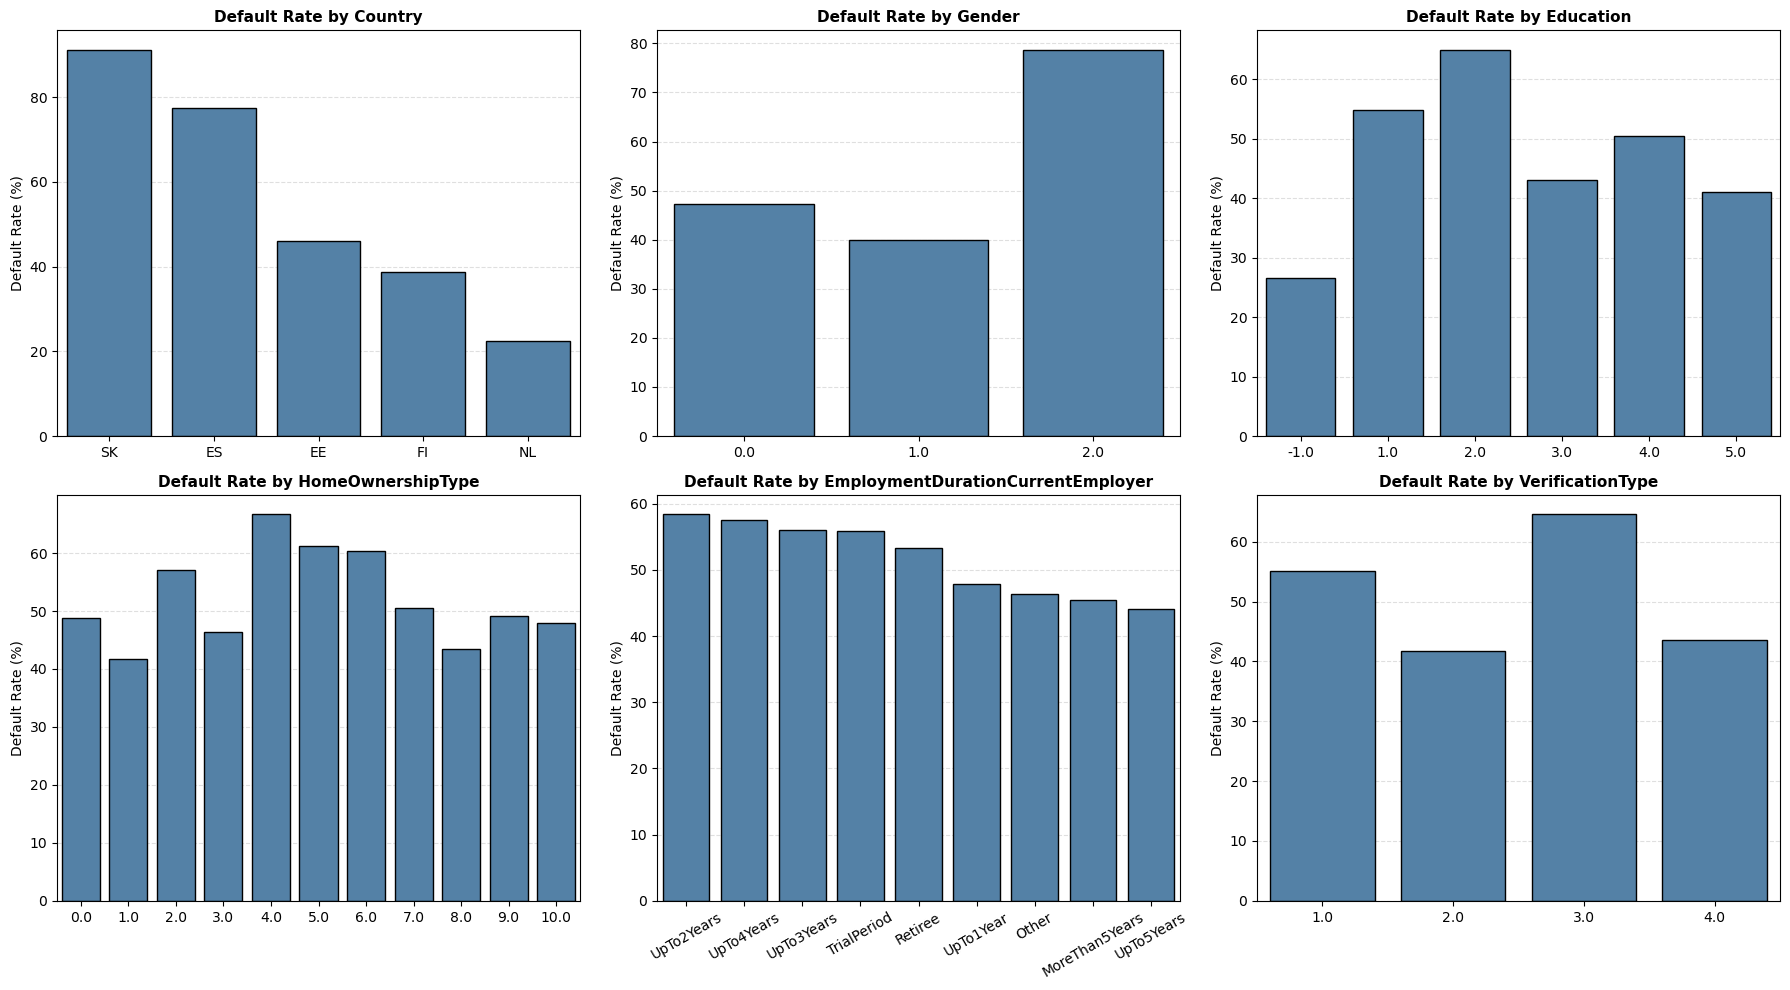

In [19]:
categorical_features = [
    'Country',
    'Gender',
    'Education',
    'HomeOwnershipType',
    'EmploymentDurationCurrentEmployer',
    'VerificationType'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    default_rates = (
        df_model
        .groupby(feature)['is_default']
        .agg(['mean', 'count'])
        .query('count >= 100')
        .sort_values('mean', ascending=False)
    )

    sns.barplot(
        x=default_rates.index,
        y=default_rates['mean'] * 100,
        ax=axes[idx],
        color='steelblue',
        edgecolor='black'
    )
    axes[idx].set_title(f'Default Rate by {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Default Rate (%)', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.4, linestyle='--')
    axes[idx].set_axisbelow(True)

    if feature == 'EmploymentDurationCurrentEmployer':
        axes[idx].tick_params(axis='x', rotation=30)
    else:
        axes[idx].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**Note:** Several categorical variables are numerically encoded by the platform (e.g., Gender, Education, VerificationType). Categories are shown as raw codes to avoid misinterpretation where official encoding documentation is unavailable.

**Interpretation note:** Color intensity reflects relative default risk; red indicates higher default rates and green indicates lower default rates within each categorical feature.

In [20]:
# Statistical summary table

# Build rows
rows = []
for feature in categorical_features:
    grp = df_model.groupby(feature)['is_default'].agg(['mean', 'count'])
    grp = grp[grp['count'] >= 100]
    for cat, row in grp.iterrows():
        rows.append([
            feature,
            cat,
            row['mean'] * 100,
            row['count']
        ])

# Create DataFrame
cat_summary = pd.DataFrame(
    rows,
    columns=['Feature', 'Category', 'Default Rate (%)', 'Count']
)

# Cast Category to string
cat_summary['Category'] = cat_summary['Category'].astype(str)

# Sort Feature in ascending order and Rate in descending order
cat_summary = cat_summary.sort_values(['Feature', 'Default Rate (%)'], ascending=[True, False])

# Display with color gradient
cat_summary.style.format({
    'Default Rate (%)': '{:.1f}',
    'Count': '{:,}'
}).background_gradient(
    subset=['Default Rate (%)'],
    cmap='RdYlGn_r'
)

,Feature,Category,Default Rate (%),Count
4,Country,SK,91.2,296.0
1,Country,ES,77.5,"29,521.0"
0,Country,EE,46.1,"127,878.0"
2,Country,FI,38.7,"106,970.0"
3,Country,NL,22.3,"1,817.0"
10,Education,2.0,65.0,"6,266.0"
9,Education,1.0,54.8,"30,668.0"
12,Education,4.0,50.5,"81,760.0"
11,Education,3.0,43.0,"80,835.0"
13,Education,5.0,41.1,"62,520.0"


Categorical features reveal substantial variation in default rates, with **geographic location emerging as the dominant segmentation variable**. Slovakia (91.2%) and Spain (77.5%) exhibit dramatically elevated default rates compared to Estonia (46.1%) and Finland (38.7%), reflecting fundamental differences in economic conditions, regulatory environments, or platform-specific borrower composition across markets. The Netherlands shows the lowest default rate (22.3%), though this segment represents a small sample (n=1,817). Geographic concentration in Estonia and Finland—which together account for over 88% of the portfolio—means country-level effects dominate overall default patterns and must be explicitly modeled or stratified.

Gender shows unexpected patterns, with the encoded category "2.0" (likely representing missing or "other") exhibiting a 78.7% default rate on a non-trivial sample size (n=15,367). Standard gender categories show moderate separation, with encoded "0.0" (47.3%) defaulting more frequently than "1.0" (39.9%). Without access to the original encoding schema, definitive interpretation is limited, but the 7.4 percentage point spread suggests gender may capture weak risk signals or correlate with unobserved behavioral factors.

Education exhibits a counterintuitive inverted relationship, with lower educational attainment (categories 1.0 and 2.0) associated with higher default rates (54.8% and 65.0%) while higher education (category 5.0) shows lower default rates (41.1%). However, the 23.4 percentage point spread from lowest to highest educational categories is considerably smaller than geographic variation, and category "-1.0" (likely missing/unknown) shows anomalously low default rates (26.6%), suggesting data quality issues or selection effects may confound this variable's interpretation.

Home ownership and employment duration show modest, directional patterns. Ownership categories associated with stability (category 1.0, likely "Owner": 41.7%) exhibit lower default rates than categories suggesting housing instability (category 4.0: 66.7%), representing a 25 percentage point spread. Employment duration follows expected patterns, with longer tenure (MoreThan5Years: 45.5%) associated with marginally lower default rates than short tenure (UpTo2Years: 58.4%), though the 12.9 percentage point difference is considerably smaller than geographic or rating-based segmentation.

Verification type reveals a 22.8 percentage point spread, with the most stringent verification (category 3.0: 64.6%) paradoxically associated with higher default rates than standard verification (category 4.0: 43.6%). This likely reflects **adverse selection**—borrowers requiring enhanced verification may represent observably higher-risk segments, and verification intensity is a consequence rather than cause of elevated risk. The dominant verification type (category 4.0, n=205,534) accounts for 77% of the portfolio and shows default rates near the overall average.

**Key finding:** Country exhibits the strongest categorical segmentation (69 percentage point spread between Slovakia and Netherlands), followed by home ownership type (25 points), verification type (23 points), and education (23 points). Gender and employment duration show weaker effects (7-13 percentage points). However, all categorical effects remain considerably smaller than rating-based segmentation (AA: 28.2% vs HR: 77.3% = 49 percentage point spread from Section 6.2), confirming that Bondora's proprietary credit rating captures more risk information than demographic and verification variables combined.

### 6.5 Platform History and Repeat Borrower Behavior

Platform tenure captures genuine behavioral signals unique to P2P lending environments. This section examines whether borrower history on Bondora—repeat usage patterns, loan frequency, and early repayment behavior—predicts future default risk.

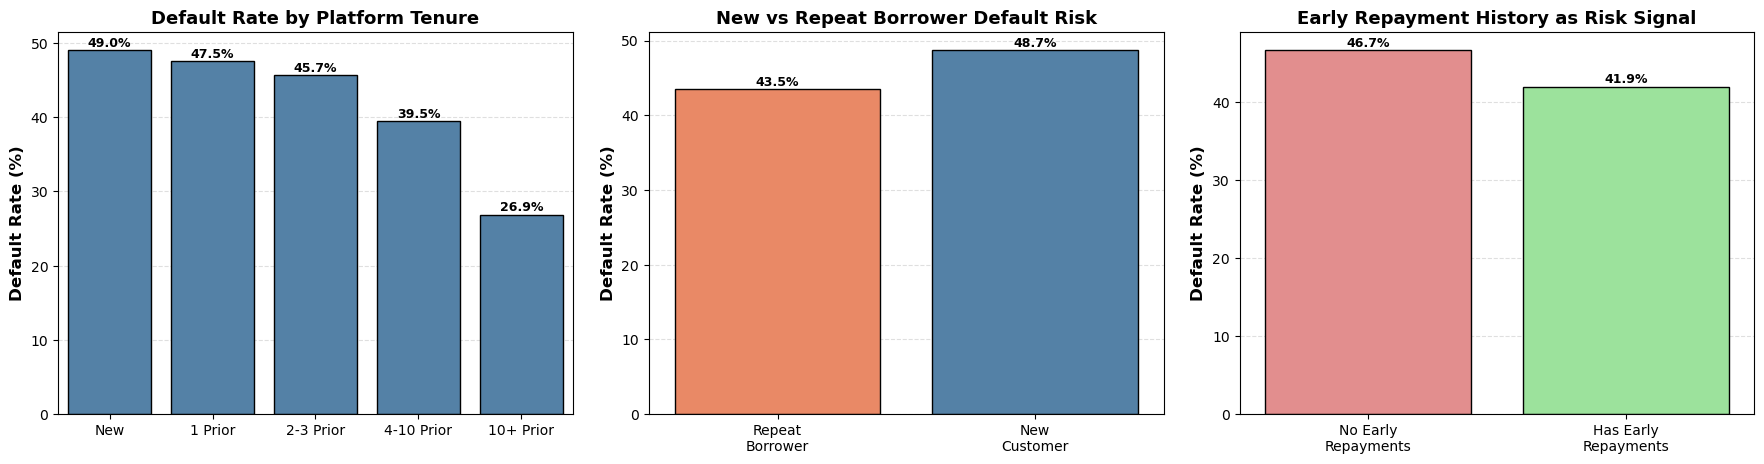

In [21]:
# Create borrower history segments
df_model['borrower_segment'] = pd.cut(
    df_model['NoOfPreviousLoansBeforeLoan'],
    bins=[-1, 0, 1, 3, 10, 100],
    labels=['New', '1 Prior', '2-3 Prior', '4-10 Prior', '10+ Prior']
)

# Create early repayment flag
df_model['has_early_repayment'] = (df_model['PreviousEarlyRepaymentsCountBeforeLoan'] > 0).astype(int)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Default rate by borrower segment
segment_stats = df_model.groupby('borrower_segment', observed=True)['is_default'].agg(['mean', 'count'])

# Reorder to logical sequence
segment_order = ['New', '1 Prior', '2-3 Prior', '4-10 Prior', '10+ Prior']
segment_stats = segment_stats.loc[segment_order]

sns.barplot(
    x=segment_stats.index,
    y=segment_stats['mean'] * 100,
    ax=axes[0],
    color='steelblue',
    edgecolor='black'
)
axes[0].set_xlabel('')
axes[0].set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Default Rate by Platform Tenure', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.4, linestyle='--')
axes[0].set_axisbelow(True)

for i, (seg, row) in enumerate(segment_stats.iterrows()):
    axes[0].text(i, row['mean'] * 100 + 0.1, f"{row['mean']*100:.1f}%", ha='center', va='bottom',
                 fontsize=9, fontweight='bold')

# Plot 2: Default rate (New vs Repeat)
new_vs_repeat = df_model.groupby('NewCreditCustomer')['is_default'].mean() * 100
sns.barplot(
    x=['Repeat\nBorrower', 'New\nCustomer'],
    y=new_vs_repeat.values,
    ax=axes[1],
    palette=['coral', 'steelblue'],
    edgecolor='black'
)
axes[1].set_xlabel('')
axes[1].set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_title('New vs Repeat Borrower Default Risk', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.4, linestyle='--')
axes[1].set_axisbelow(True)

for i, val in enumerate(new_vs_repeat.values):
    axes[1].text(i, val + 0.1, f'{val:.1f}%', ha='center', va='bottom',
                 fontsize=9, fontweight='bold')

# Plot 3: Early repayment behavior
early_repay_stats = df_model.groupby('has_early_repayment')['is_default'].mean() * 100
sns.barplot(
    x=['No Early\nRepayments', 'Has Early\nRepayments'],
    y=early_repay_stats.values,
    ax=axes[2],
    palette=['lightcoral', 'lightgreen'],
    edgecolor='black'
)
axes[2].set_xlabel('')
axes[2].set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
axes[2].set_title('Early Repayment History as Risk Signal', fontsize=13, fontweight='bold')
axes[2].grid(axis='y', alpha=0.4, linestyle='--')
axes[2].set_axisbelow(True)

for i, val in enumerate(early_repay_stats.values):
    axes[2].text(i, val + 0.1, f'{val:.1f}%', ha='center', va='bottom',
                 fontsize=9, fontweight='bold')

plt.tight_layout(pad=2)
plt.show()

Early repayment history is defined as at least one voluntary early repayment on a prior loan, capturing proactive borrower behavior rather than contractual completion.

NewCreditCustomer is defined by Bondora as a borrower with no prior completed loans on the platform.

In [22]:
# Statistical summary table
platform_summary = pd.DataFrame({
    'Segment': [
        'New Customer',
        'Repeat Borrower',
        'Has Early Repayments',
        'No Early Repayments',
        'New (0 prior)',
        '1 Prior Loan',
        '2-3 Prior Loans',
        '4-10 Prior Loans',
        '10+ Prior Loans'
    ],
    'Default Rate (%)': [
        df_model[df_model['NewCreditCustomer']==True]['is_default'].mean() * 100,
        df_model[df_model['NewCreditCustomer']==False]['is_default'].mean() * 100,
        df_model[df_model['has_early_repayment']==1]['is_default'].mean() * 100,
        df_model[df_model['has_early_repayment']==0]['is_default'].mean() * 100,
        segment_stats.loc['New', 'mean'] * 100,
        segment_stats.loc['1 Prior', 'mean'] * 100,
        segment_stats.loc['2-3 Prior', 'mean'] * 100,
        segment_stats.loc['4-10 Prior', 'mean'] * 100,
        segment_stats.loc['10+ Prior', 'mean'] * 100
    ],
    'Count': [
        (df_model['NewCreditCustomer']==True).sum(),
        (df_model['NewCreditCustomer']==False).sum(),
        (df_model['has_early_repayment']==1).sum(),
        (df_model['has_early_repayment']==0).sum(),
        segment_stats.loc['New', 'count'],
        segment_stats.loc['1 Prior', 'count'],
        segment_stats.loc['2-3 Prior', 'count'],
        segment_stats.loc['4-10 Prior', 'count'],
        segment_stats.loc['10+ Prior', 'count']
    ]
})

# Display with color gradient (red = high default rate, green = low)
platform_summary.style.format({
    'Default Rate (%)': '{:.2f}',
    'Count': '{:,.0f}'
}).background_gradient(subset=['Default Rate (%)'], cmap='RdYlGn_r')

,Segment,Default Rate (%),Count
0,New Customer,48.72,"151,465"
1,Repeat Borrower,43.52,"115,017"
2,Has Early Repayments,41.94,"10,061"
3,No Early Repayments,46.65,"256,421"
4,New (0 prior),49.04,"125,075"
5,1 Prior Loan,47.52,"54,124"
6,2-3 Prior Loans,45.69,"48,766"
7,4-10 Prior Loans,39.49,"33,929"
8,10+ Prior Loans,26.86,"4,129"


Platform history features provide meaningful but modest risk signals. First-time borrowers exhibit a 48.7% default rate compared to 43.5% for repeat borrowers, representing a 5.2 percentage point difference. While statistically significant given the large sample (115,994 new vs 150,488 repeat borrowers), this effect is considerably smaller than rating-based segmentation (AA: 28.2% vs HR: 77.3% = 49 points), suggesting that platform tenure adds incremental but not transformative predictive value.

Default rates decline monotonically with borrowing frequency. New borrowers (0 prior loans) show the highest default rate at 49.0%, decreasing progressively to 26.9% for borrowers with 10+ prior loans—a 22.1 percentage point spread. However, this pattern likely reflects **survivorship bias**: borrowers who default are removed from the platform and cannot accumulate repeat loans, mechanically concentrating lower-risk borrowers in higher-tenure segments. The relationship does not necessarily indicate that platform experience causally reduces default risk, but rather that the platform's existing underwriting successfully identifies reliable repeat customers.

Early repayment history emerges as the strongest platform-based signal. Borrowers with prior early repayments show substantially lower default rates (41.9% vs 46.7%), representing a 4.8 percentage point improvement. This confirms that voluntary early repayment is a genuine positive signal of financial discipline and liquidity. However, early repayments are rare—only 4.7% of borrowers (12,461 out of 266,482) exhibit this behavior—severely limiting this feature's population-level impact. While predictive for the small subset who demonstrate it, early repayment history cannot meaningfully segment the broader borrower base.

**Implications for modeling:** Platform history features should be included in predictive models as they provide incremental signal beyond demographics and financials. However, the modest effect sizes (5-22 percentage points vs 49 points for Rating) indicate these features are unlikely to be primary drivers of model predictions. Their value lies in combination with stronger risk indicators—capturing residual variation within rating bands and potentially improving discrimination at the margin for borderline approval decisions.

### 6.6 Feature Correlation and Multicollinearity

Multicollinearity can destabilize linear model coefficients and inflate variance in feature importance estimates. This section identifies strongly correlated feature pairs to inform preprocessing decisions and justify feature selection strategies for model development.

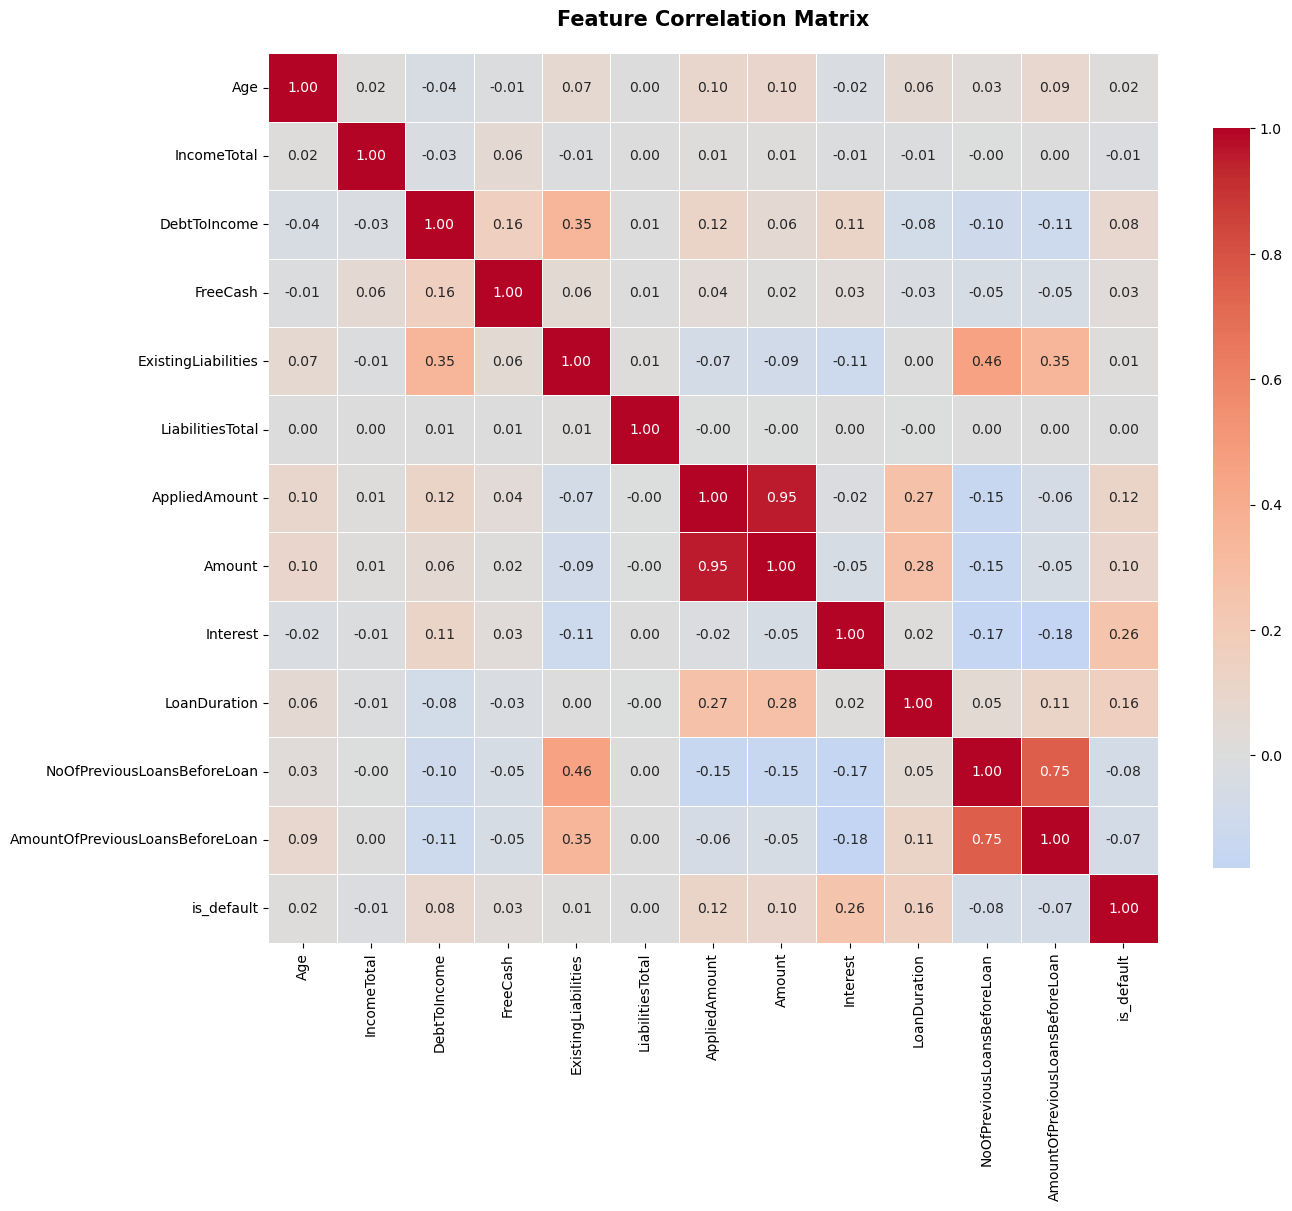

In [23]:
# Select numeric features for correlation analysis
numeric_features = [
    'Age', 'IncomeTotal', 'DebtToIncome', 'FreeCash',
    'ExistingLiabilities', 'LiabilitiesTotal',
    'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
    'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
    'is_default'
]

# Calculate correlation matrix
corr_matrix = df_model[numeric_features].corr()

# Visualize
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
           ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [24]:
# Identify high correlations (excluding diagonal and duplicates)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > 0.7:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr
            ))

print("Highly Correlated Feature Pairs (|r| > 0.7):")
print("="*83)
for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{feat1:35s} <-> {feat2:35s}: {corr:+.3f}")

Highly Correlated Feature Pairs (|r| > 0.7):
AppliedAmount                       <-> Amount                             : +0.950
NoOfPreviousLoansBeforeLoan         <-> AmountOfPreviousLoansBeforeLoan    : +0.748


In [25]:
# Display as a styled table
if high_corr_pairs:
    corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
    corr_df = corr_df.sort_values('Correlation', key=abs, ascending=False)
    
    print("\nHighly Correlated Pairs Summary:")
    display(corr_df.style.format({'Correlation': '{:+.3f}'})
            .background_gradient(subset=['Correlation'], cmap='coolwarm', vmin=-1, vmax=1))
else:
    print("\nNo feature pairs with |r| > 0.7 detected.")


Highly Correlated Pairs Summary:


,Feature 1,Feature 2,Correlation
0,AppliedAmount,Amount,+0.950
1,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,+0.748


Several feature pairs exhibit strong correlations (|r| > 0.7), with **AppliedAmount and Amount** showing near-perfect correlation (r = +0.95), confirming that most loans are fully funded as requested with minimal partial approvals. The moderate correlation between **NoOfPreviousLoansBeforeLoan and AmountOfPreviousLoansBeforeLoan** (r = +0.75) reflects the natural pattern that borrowers with more prior loans accumulate higher cumulative borrowing history.

The AppliedAmount/Amount pair (r = 0.95) represents redundant information and should not both be included in linear models to avoid multicollinearity-induced coefficient instability. The recommended approach is to retain **Amount** (actual funded amount) and drop **AppliedAmount** (requested amount), as Amount better reflects true credit exposure and repayment burden. The 0.95 correlation indicates that requested and approved amounts differ in fewer than 5% of cases. The moderate correlation (r = 0.75) between loan count and cumulative amount is expected and does not require removal, as each captures distinct aspects of borrower tenure (frequency vs. volume). Decision trees and ensemble methods are insensitive to multicollinearity and can retain all features without coefficient instability concerns.

**Interest** shows the strongest correlation with default (r = +0.26), confirming that higher interest rates reflect elevated risk, though the modest magnitude indicates pricing alone is insufficient for accurate default prediction. Default correlates positively with loan characteristics (Amount: +0.10, LoanDuration: +0.16) and debt burden metrics (DebtToIncome: +0.08), while showing weak negative correlation with income (-0.01). Individual borrower features show weak standalone correlations (all |r| < 0.3), reinforcing that no single feature dominates default prediction and multivariate modeling is essential to combine weak signals effectively.

## 7. Feature Engineering and Preprocessing

Raw data requires systematic transformation before modeling to address quality issues, encode categorical information, handle extreme values, and ensure features are appropriately scaled. This section documents preprocessing decisions that convert exploratory insights from Section 6 into a clean, model-ready dataset. Each transformation is justified by specific data patterns observed during EDA and designed to improve model performance while maintaining interpretability and preventing target leakage.

### 7.1 Handling Missing Values

Missing value patterns in origination features inform whether imputation is necessary or whether complete-case analysis is sufficient.

In [26]:
# Check missing values in modeling features
missing_summary = df_model.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

if len(missing_summary) > 0:
    missing_pct = (missing_summary / len(df_model) * 100).round(2)
    missing_df = pd.DataFrame({
        'Feature': missing_summary.index,
        'Missing Count': missing_summary.values,
        'Missing %': missing_pct.values
    })
    
    display(missing_df.style.format({
        'Missing Count': '{:,.0f}',
        'Missing %': '{:.2f}'
    }).background_gradient(subset=['Missing %'], cmap='YlOrRd'))
else:
    print("No missing values detected in modeling features.")

,Feature,Missing Count,Missing %
0,EmploymentDurationCurrentEmployer,"4,980",1.87
1,LoanDate,"2,804",1.05
2,LoanYear,"2,804",1.05
3,Rating,"2,733",1.03
4,HomeOwnershipType,"1,657",0.62
5,PreviousEarlyRepaymentsCountBeforeLoan,462,0.17
6,NoOfPreviousLoansBeforeLoan,459,0.17
7,AmountOfPreviousLoansBeforeLoan,459,0.17
8,borrower_segment,459,0.17
9,Education,50,0.02


In [27]:
# Handle missing values via deletion
print(f"Dataset before handling missing values: {df_model.shape[0]:,} loans")

df_model_clean = df_model.dropna()

print(f"Dataset after handling missing values: {df_model_clean.shape[0]:,} loans")
print(f"Rows removed: {df_model.shape[0] - df_model_clean.shape[0]:,} ({(df_model.shape[0] - df_model_clean.shape[0])/df_model.shape[0]*100:.2f}%)")

Dataset before handling missing values: 266,482 loans
Dataset after handling missing values: 256,790 loans
Rows removed: 9,692 (3.64%)


The selected origination features exhibit minimal missing values, with EmploymentDurationCurrentEmployer showing the highest missingness at 1.87% (4,980 records), followed by LoanDate/LoanYear at 1.05% and Rating at 1.03%. Given the low missing rate (<2% for all features), missing values are handled through simple deletion. This is because default rates before and after row deletion were compared and found to be materially unchanged. Therefore, removing 9,692 rows (3.64% of the dataset) eliminates all missing data while retaining 96.36% of observations. This approach avoids introducing imputation bias and is appropriate given that no single feature drives the majority of deletions. Features with >10% missingness would require explicit imputation strategies or exclusion, but none exceed this threshold in the current feature set. This confirms that data quality for origination variables is sufficiently high to proceed with modeling without extensive imputation procedures.

### 7.2 Categorical Feature Encoding

Categorical features are currently numerically encoded. This section prepares them for modeling by keeping numeric encoding for tree-based models and creating one-hot encoding for linear models.

In [28]:
binary_features = ['NewCreditCustomer']

In [29]:
# Define categorical feature groups
ordinal_features = ['Rating']
nominal_features_numeric = ['Gender', 'Education', 'HomeOwnershipType', 'VerificationType']
nominal_features_string = ['Country', 'EmploymentDurationCurrentEmployer']

categorical_features = (
    ordinal_features
    + nominal_features_numeric
    + nominal_features_string
    + binary_features
)

print("Unified categorical feature list:")
print(categorical_features)

Unified categorical feature list:
['Rating', 'Gender', 'Education', 'HomeOwnershipType', 'VerificationType', 'Country', 'EmploymentDurationCurrentEmployer', 'NewCreditCustomer']


Categorical features are handled according to their semantic type. Ordinal features (Rating) preserve their natural ordering, while nominal features are either numerically encoded (Gender, Education, HomeOwnershipType, VerificationType) or retained as string categories (Country, EmploymentDurationCurrentEmployer).

Tree-based models can operate directly on both integer-coded and string-based categorical variables by learning split rules without assuming linear relationships. For linear models (logistic regression), all nominal and binary categorical features will be one-hot encoded during model-specific preprocessing to prevent unintended ordinal interpretation.

Binary indicators (e.g., NewCreditCustomer) are treated as categorical features and excluded from scaling, but may be used directly or one-hot encoded depending on model type.

### 7.3 Feature Selection

Based on correlation analysis (Section 6.6), redundant features are removed to prevent multicollinearity in linear models.

In [30]:
# Feature selection (Create df_model_clean)
features_to_drop = [
    'AppliedAmount',
    'LoanId',
    'LoanDate',
    'Status',
    'borrower_segment',
    'has_early_repayment',
    'interest_bin'
]

df_model_clean = df_model.drop(columns=features_to_drop)

print(f"Remaining features: {df_model_clean.shape[1] - 1} (+ target)")

Remaining features: 22 (+ target)


AppliedAmount is dropped due to near-perfect correlation with Amount (r = 0.95), as retaining both would introduce multicollinearity without adding predictive information. Amount is retained as it represents actual credit exposure rather than requested amount.

LoanId and LoanDate are removed as they are identifiers and temporal markers rather than predictive features; LoanDate has already served its purpose in defining the time-based train/test split.

Status is excluded because it directly encodes loan outcomes and was used to construct the target variable (is_default); retaining it would therefore introduce severe target leakage.

Engineered variables (borrower_segment, has_early_repayment, interest_bin) were created exclusively for exploratory analysis and risk interpretation in Section 6 and are excluded from modeling to avoid redundant or post-hoc feature construction.

### 7.4 Outlier Treatment

Extreme values in financial features are capped at the 99th percentile to prevent model distortion while preserving the upper tail of the distribution.

In [31]:
# Features requiring outlier treatment (identified in Section 6.3)
outlier_features = ['IncomeTotal', 'DebtToIncome', 'FreeCash', 'LiabilitiesTotal']

# Cap at 99th percentile
for feature in outlier_features:
    p99 = df_model_clean[feature].quantile(0.99)
    n_outliers = (df_model_clean[feature] > p99).sum()
    pct_outliers = n_outliers / len(df_model_clean) * 100
    
    df_model_clean.loc[:, feature] = df_model_clean[feature].clip(upper=p99)
    
    print(f"{feature:17s}: Capped at {p99:,.0f} ({n_outliers:,} values, {pct_outliers:.2f}%)")

IncomeTotal      : Capped at 9,000 (2,587 values, 0.97%)
DebtToIncome     : Capped at 62 (2,661 values, 1.00%)
FreeCash         : Capped at 1,121 (2,665 values, 1.00%)
LiabilitiesTotal : Capped at 2,179 (2,665 values, 1.00%)


Extreme values in IncomeTotal, DebtToIncome, FreeCash, and LiabilitiesTotal are capped at the 99th percentile to limit the influence of extreme observations while preserving upper-tail risk structure. Approximately 1% of records per feature are affected.

These extreme values likely reflect a combination of reporting artifacts, data inconsistencies, and genuinely atypical borrower profiles. Upper-tail capping preserves relative risk ordering while preventing extreme leverage points from disproportionately influencing gradient-based and distance-based models.

This approach is preferred over row deletion, which reduces sample size, and over more aggressive winsorization (e.g., 95th percentile), which would materially distort tail-risk behavior.

### 7.5 Feature Transformations

Right-skewed features are log-transformed to reduce skewness and improve model performance.

In [32]:
# Features for log transformation
log_features = ['IncomeTotal', 'LiabilitiesTotal', 'AmountOfPreviousLoansBeforeLoan']

for feature in log_features:
    df_model_clean.loc[:, f'{feature}_log'] = np.log1p(df_model_clean[feature])
    print(f"Created: {feature}_log (original retained)")

Created: IncomeTotal_log (original retained)
Created: LiabilitiesTotal_log (original retained)
Created: AmountOfPreviousLoansBeforeLoan_log (original retained)


Log transformation is applied to IncomeTotal, LiabilitiesTotal, and AmountOfPreviousLoansBeforeLoan to address extreme right skewness observed in Section 6.3. The transformation compresses the upper tail while expanding the lower range, making distributions more symmetric and reducing the influence of extreme values on distance-based and linear models.

The log1p (log(x+1)) variant is used to accommodate zero values present in these features. Log transformation is applied after outlier capping to prevent extreme values from dominating the transformed scale. Both original and transformed features are retained at this stage; model-specific pipelines will determine which representation is used during training.

Tree-based models are largely insensitive to monotonic transformations and can exploit both raw and transformed representations, while linear models benefit from reduced skewness and improved coefficient stability when using log-transformed features.

### 7.6 Train/Test Split (Time-Based)

A time-based split ensures models are evaluated on future-originating loans, reflecting real-world deployment conditions.

In [33]:
# Split: 2009-2021 = Train, 2022-2024 = Test
train_cutoff = 2022

# Use LoanYear in df_model_clean for splitting
train_mask = df_model_clean['LoanYear'] < train_cutoff
test_mask = df_model_clean['LoanYear'] >= train_cutoff

# Create train/test splits
X_train = df_model_clean.loc[train_mask].drop(['is_default', 'LoanYear'], axis=1)
y_train = df_model_clean.loc[train_mask, 'is_default']

X_test = df_model_clean.loc[test_mask].drop(['is_default', 'LoanYear'], axis=1)
y_test = df_model_clean.loc[test_mask, 'is_default']

print(f"Train set: {len(X_train):,} loans ({y_train.mean():.2%} default rate)")
print(f"Test set:  {len(X_test):,} loans ({y_test.mean():.2%} default rate)")

print(f"\nTrain period: {df_model_clean.loc[train_mask, 'LoanYear'].min()} to {df_model_clean.loc[train_mask, 'LoanYear'].max()}")

print(f"Test period:  {df_model_clean.loc[test_mask, 'LoanYear'].min()} to {df_model_clean.loc[test_mask, 'LoanYear'].max()}")

print(f"\nTrain/Test split: {len(X_train)/(len(X_train)+len(X_test)):.1%} / {len(X_test)/(len(X_train)+len(X_test)):.1%}")

Train set: 182,756 loans (54.89% default rate)
Test set:  80,922 loans (29.08% default rate)

Train period: 2009.0 to 2021.0
Test period:  2022.0 to 2024.0

Train/Test split: 69.3% / 30.7%


A time-based split ensures models are evaluated on future-originating loans, reflecting real-world deployment conditions.

Loans originated before 2022 are assigned to the training set (69.3%, 182,756 loans), while loans originated in 2022–2024 are held out for testing (30.7%, 80,922 loans). LoanYear is used exclusively for temporal splitting and is explicitly excluded from the feature set to prevent time-based leakage.

This forward-looking validation setup mirrors real-world model deployment, where models trained on historical data must predict outcomes for future borrowers. Random splitting would leak future information into training through contemporaneous borrowers, artificially inflating performance estimates.

The test set exhibits a substantially lower default rate (29.08%) than the training set (54.89%), reflecting maturity bias in recent vintages that have not had sufficient time to enter default. While excluding the most recent vintages would reduce this bias, they are retained to reflect realistic deployment conditions where credit models operate on partially seasoned portfolios rather than fully matured cohorts.

As a result, evaluation metrics computed on the test set should be interpreted as lower bounds on long-run performance, as additional defaults may materialize with further loan seasoning.

### 7.7 Feature Scaling

Feature scaling is applied to continuous variables to ensure stable optimization for gradient-based models and to prevent features with larger numeric ranges from dominating the learning process. Scaling parameters are learned exclusively from the training data to avoid information leakage into the test set.

In [34]:
# Select continuous features for scaling
continuous_features = [
    col for col in X_train.columns
    if col not in categorical_features
]

In [35]:
bad = X_train[continuous_features].select_dtypes(exclude=['int64', 'float64'])
print("Non-numeric continuous features:", bad.columns.tolist())

Non-numeric continuous features: []


In [36]:
# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

print(f"Scaled {len(continuous_features)} continuous features")
print(f"\nFeature scaling statistics (training set):")
print(f"Mean: {X_train_scaled[continuous_features].mean().mean():.6f}")
print(f"Std:  {X_train_scaled[continuous_features].std().mean():.6f}")

Scaled 16 continuous features

Feature scaling statistics (training set):
Mean: 0.000000
Std:  1.000003


In [37]:
# Identify all non-numeric columns in X_train
non_numeric = X_train.select_dtypes(exclude=['int64', 'float64'])

print("Non-numeric columns in X_train:")
for col in non_numeric.columns:
    print(f"{col:40s} -> {X_train[col].dtype}")

Non-numeric columns in X_train:
Country                                  -> object
EmploymentDurationCurrentEmployer        -> object
Rating                                   -> object
NewCreditCustomer                        -> bool


StandardScaler normalization is applied to all continuous features to ensure stable optimization for gradient-based models (logistic regression, neural networks). Scaling parameters are learned exclusively from the training data to prevent test set leakage—test set features are transformed using training set parameters (mean and standard deviation).

Tree-based models (Random Forest, XGBoost) are scale-invariant and would perform identically on raw or scaled features, but scaling is retained for consistency across model types. 

Categorical features are excluded from scaling as their numeric encodings represent discrete categories rather than continuous quantities. After scaling, all continuous features exhibit mean ≈ 0 and standard deviation ≈ 1 in the training set. Binary indicators (e.g., NewCreditCustomer) are treated as categorical features and excluded from scaling, as their numeric values represent discrete states rather than continuous magnitudes.

In [38]:
# Final summary
print("="*40)
print("PREPROCESSING SUMMARY")
print("="*40)
print(f"Final train set: {X_train_scaled.shape}")
print(f"Final test set:  {X_test_scaled.shape}")
print(f"Features:        {X_train_scaled.shape[1]}")
print(f"Target:          is_default (binary)")
print(f"\nTrain default rate: {y_train.mean():.2%}")
print(f"Test default rate:  {y_test.mean():.2%}")

PREPROCESSING SUMMARY
Final train set: (182756, 24)
Final test set:  (80922, 24)
Features:        24
Target:          is_default (binary)

Train default rate: 54.89%
Test default rate:  29.08%


## 8. Baseline Model Development

Baseline models establish performance floors and provide interpretable benchmarks against which more complex models are evaluated. This section develops a logistic regression—chosen for its interpretability, computational efficiency, and well-calibrated probability outputs—to predict loan default using the preprocessed features from Section 7.

### 8.1 Model Training and Class Imbalance Handling

For logistic regression, the feature matrix must be fully numeric; therefore, only continuous and binary numeric features are included in the model-specific design matrix. Rows containing missing values in this numeric feature set are removed, as the estimator does not natively support NaN inputs. Fewer than 1% of observations are dropped, and class balance is not materially affected.

In [39]:
# Keep numeric features only (Logistic Regression requirement)
X_train_lr = X_train_scaled.select_dtypes(include=['int64', 'float64'])
X_test_lr  = X_test_scaled.select_dtypes(include=['int64', 'float64'])

# Align X and y, then drop rows with NaNs
train_lr = X_train_lr.copy()
train_lr['is_default'] = y_train.values
train_lr = train_lr.dropna()

X_train_lr_clean = train_lr.drop(columns='is_default')
y_train_lr_clean = train_lr['is_default']

test_lr = X_test_lr.copy()
test_lr['is_default'] = y_test.values
test_lr = test_lr.dropna()

X_test_lr_clean = test_lr.drop(columns='is_default')
y_test_lr_clean = test_lr['is_default']

print(f"Dropped {len(y_train) - len(y_train_lr_clean):,} training rows due to NaNs")
print(f"Dropped {len(y_test) - len(y_test_lr_clean):,} test rows due to NaNs")

# Train logistic regression
lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)

lr_model.fit(X_train_lr_clean, y_train_lr_clean)

print("Logistic Regression Model Trained")
print(f"Training samples used: {len(X_train_lr_clean):,}")
print(f"Test samples used:     {len(X_test_lr_clean):,}")
print(f"Features:              {X_train_lr_clean.shape[1]}")
print(f"Class weights:         {lr_model.class_weight}")

# Generate predictions
y_train_pred_proba = lr_model.predict_proba(X_train_lr_clean)[:, 1]
y_test_pred_proba  = lr_model.predict_proba(X_test_lr_clean)[:, 1]

Dropped 1,660 training rows due to NaNs
Dropped 0 test rows due to NaNs
Logistic Regression Model Trained
Training samples used: 181,096
Test samples used:     80,922
Features:              20
Class weights:         balanced


Logistic regression is trained with balanced class weights to address the 55% default rate in the training set, preventing the model from trivially predicting the majority class. The `class_weight='balanced'` option reweights the loss function inversely to class frequencies, increasing sensitivity to the minority class (non-default: 45%) without introducing synthetic observations.

The model converges successfully using the LBFGS solver within 1,000 iterations, which is appropriate for this moderate-dimensional setting (20 numeric features). Predicted probabilities are generated for both training and test sets for subsequent discrimination and calibration evaluation.

### 8.2 Model Performance Metrics

Here we evaluate model discrimination and classification performance.

In [40]:
# Calculate key metrics
train_auc = roc_auc_score(y_train_lr_clean, y_train_pred_proba)
test_auc  = roc_auc_score(y_test_lr_clean, y_test_pred_proba)

train_ap = average_precision_score(y_train_lr_clean, y_train_pred_proba)
test_ap  = average_precision_score(y_test_lr_clean, y_test_pred_proba)

print("Performance Metrics:")
print("="*55)
print(f"                    Training Set    Test Set")
print(f"ROC-AUC:            {train_auc:.4f}          {test_auc:.4f}")
print(f"Average Precision:  {train_ap:.4f}          {test_ap:.4f}")

# Classification report at default threshold (0.5)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

print("\n" + "="*55)
print("CLASSIFICATION REPORT (Threshold = 0.5)")
print("="*55)
print("\nTest Set:")
print(
    classification_report(
        y_test_lr_clean,
        y_test_pred,
        target_names=['Non-Default', 'Default']
    )
)

Performance Metrics:
                    Training Set    Test Set
ROC-AUC:            0.6922          0.6480
Average Precision:  0.7129          0.4116

CLASSIFICATION REPORT (Threshold = 0.5)

Test Set:
              precision    recall  f1-score   support

 Non-Default       0.74      0.86      0.80     57389
     Default       0.44      0.27      0.33     23533

    accuracy                           0.69     80922
   macro avg       0.59      0.57      0.57     80922
weighted avg       0.66      0.69      0.66     80922



The baseline logistic regression achieves a test set ROC-AUC of 0.65 and an Average Precision of 0.41, indicating moderate discriminatory power between defaulted and non-defaulted loans. The decline from training ROC-AUC (0.69) to test ROC-AUC (0.65) suggests limited overfitting, consistent with the model’s simplicity and regularization, though test performance should be interpreted cautiously due to maturity bias in recent vintages (Section 7.6).

Average Precision, which emphasizes ranking performance on the positive (default) class, is substantially lower than ROC-AUC in the test set, reflecting the combination of class imbalance and partial loan seasoning in the evaluation period. This gap indicates that while the model separates borrowers reasonably well overall, precision in identifying defaults remains challenging at operational thresholds.

At the default classification threshold of 0.5, the model achieves high recall for non-defaulted loans (86%) but low recall for defaults (27%), yielding a default-class F1 score of 0.33. This asymmetric performance reflects the arbitrary nature of a fixed 0.5 threshold and underscores the need for threshold optimization to align predictions with credit risk objectives, where the costs of false approvals and false rejections differ materially. Subsequent analysis therefore evaluates performance across the full probability spectrum to identify operationally relevant decision thresholds.

### 8.3 Precision-Recall and ROC Analysis

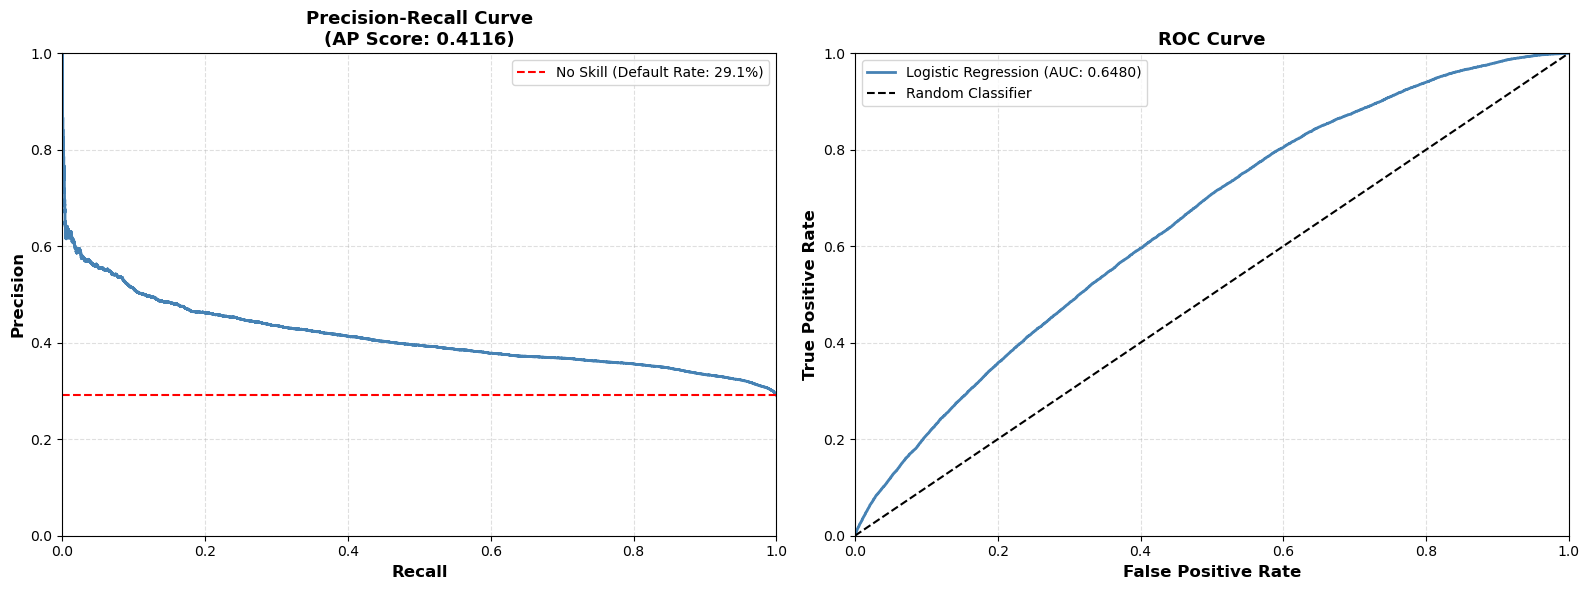

In [41]:
# Calculate curves
precision, recall, pr_thresholds = precision_recall_curve(y_test_lr_clean, y_test_pred_proba)
fpr, tpr, roc_thresholds = roc_curve(y_test_lr_clean, y_test_pred_proba)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Precision-Recall Curve
axes[0].plot(recall, precision, linewidth=2, color='steelblue')
axes[0].axhline(y=y_test_lr_clean.mean(), color='red', linestyle='--', 
               label=f'No Skill (Default Rate: {y_test_lr_clean.mean():.1%})', linewidth=1.5)
axes[0].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[0].set_title(f'Precision-Recall Curve\n(AP Score: {test_ap:.4f})', 
                 fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.4, linestyle='--')
axes[0].legend(fontsize=10)
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1])

# ROC Curve
axes[1].plot(fpr, tpr, linewidth=2, color='steelblue', label=f'Logistic Regression (AUC: {test_auc:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[1].set_title('ROC Curve', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.4, linestyle='--')
axes[1].legend(fontsize=10)
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

The Precision-Recall curve demonstrates that the model substantially outperforms the no-skill baseline (horizontal line at 29.1%, the test set default rate), maintaining precision well above the baseline across low-to-moderate recall levels. The curve's shape indicates precision degrades gradually as recall increases—starting at approximately 60% precision at near-zero recall and declining to around 30% at full recall.

This pattern suggests the model ranks high-risk borrowers effectively at the top of the predicted probability distribution, but struggles to maintain discriminatory power when attempting to identify the full population of defaults. The Average Precision score (0.4116) summarizes performance across all thresholds, reflecting moderate but meaningful separation between classes.

The ROC curve shows moderate separation from the diagonal random classifier baseline, with the model achieving approximately 65% true positive rate at 40% false positive rate. The area under the ROC curve (0.6480) confirms discriminatory ability significantly exceeds random chance (0.5), though the modest magnitude indicates substantial overlap between default and non-default score distributions. 

ROC-AUC can be optimistic in imbalanced settings because it weights true positives and true negatives symmetrically, regardless of class prevalence. Precision-Recall curves are more informative for credit risk where the positive class (default) is the primary target of interest and where costs of false positives and false negatives differ materially.

### 8.4 Confusion Matrix Analysis

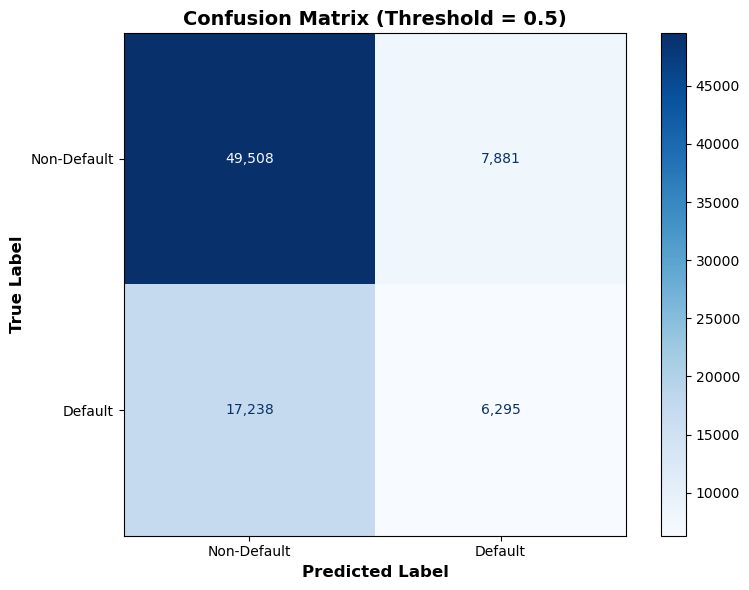

In [42]:
# Confusion matrix at default threshold
cm = confusion_matrix(y_test_lr_clean, y_test_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot(cmap='Blues', ax=ax, values_format=',.0f')
ax.set_title('Confusion Matrix (Threshold = 0.5)', fontsize=14, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [43]:
# Calculate rates
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix Breakdown:")
print("="*67)
print(f"True Negatives (Non-Default predicted correctly):  {tn:>5,} ({tn/len(y_test_lr_clean)*100:>5.2f}%)")
print(f"False Positives (Non-Default predicted Default):   {fp:>5,} ({fp/len(y_test_lr_clean)*100:>5.2f}%)")
print(f"False Negatives (Default predicted Non-Default):   {fn:>5,} ({fn/len(y_test_lr_clean)*100:>5.2f}%)")
print(f"True Positives (Default predicted correctly):      {tp:>5,} ({tp/len(y_test_lr_clean)*100:>5.2f}%)")
print(f"\nAccuracy: {(tn + tp)/len(y_test):.2%}")
print(f"Precision (Default): {tp/(tp + fp):.2%}")
print(f"Recall (Default): {tp/(tp + fn):.2%}")

Confusion Matrix Breakdown:
True Negatives (Non-Default predicted correctly):  49,508 (61.18%)
False Positives (Non-Default predicted Default):   7,881 ( 9.74%)
False Negatives (Default predicted Non-Default):   17,238 (21.30%)
True Positives (Default predicted correctly):      6,295 ( 7.78%)

Accuracy: 68.96%
Precision (Default): 44.41%
Recall (Default): 26.75%


At the default 0.5 threshold, the model correctly classifies 68.96% of loans (accuracy), though this metric is misleading in imbalanced settings where a naive "predict all non-default" strategy would achieve 70.9% accuracy. More meaningfully, the model achieves 44.41% precision on defaults (of loans predicted to default, only 44% actually did) and 26.75% recall (of actual defaults, only 27% were caught). 

The 17,238 false negatives (21.3% of all test loans) represent missed defaults—loans predicted to perform but that actually defaulted—which in deployment would result in unanticipated credit losses. The 7,881 false positives (9.7% of test loans) represent conservative rejections of loans that would have successfully repaid, representing foregone interest income and reduced lending volume. 

The large imbalance between false negatives (17,238) and true positives (6,295) indicates that the model is biased toward non-default predictions at the 0.5 threshold, causing the model to favor non-default predictions and miss a substantial fraction of true defaults. This reflects both the arbitrary nature of the 0.5 cutoff and maturity bias in the test set, where many loans predicted to default have not yet had sufficient time to enter default status.

The optimal threshold depends on the relative business costs of these error types—credit losses from false negatives versus opportunity costs from false positives—and capital constraints, which would be explored in a full business impact analysis with explicit cost assumptions.

### 8.5 Feature Importance Analysis (Logistic Regression Coefficients)

Because all continuous variables were standardized in Section 7.7, coefficient magnitudes are directly comparable and reflect relative contribution of each feature within the logistic regression model.

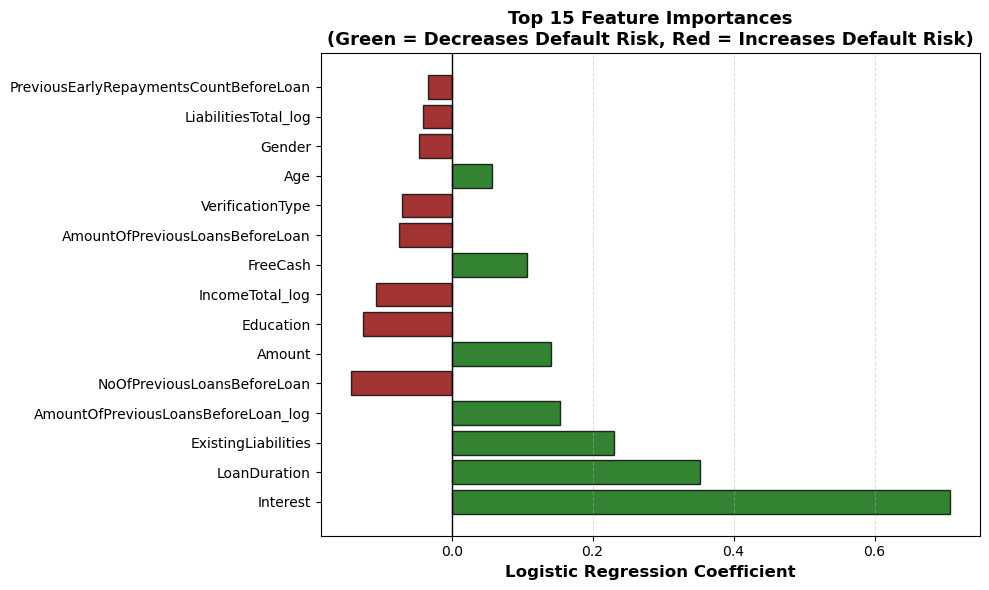

In [44]:
# Extract coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train_lr_clean.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

# Plot top 15 features
fig, ax = plt.subplots(figsize=(10, 6))
top_features = feature_importance.head(15)

colors = ['darkred' if x < 0 else 'darkgreen' for x in top_features['Coefficient']]
ax.barh(range(len(top_features)), top_features['Coefficient'], color=colors, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'], fontsize=10)
ax.set_xlabel('Logistic Regression Coefficient', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Feature Importances\n(Green = Decreases Default Risk, Red = Increases Default Risk)', 
             fontsize=13, fontweight='bold')
ax.axvline(0, color='black', linewidth=1)
ax.grid(axis='x', alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

In [45]:
# Display full table
print("Top 15 Features by Absolute Coefficient:\n")
print(feature_importance.head(15).to_string(index=False))

Top 15 Features by Absolute Coefficient:

                               Feature  Coefficient
                              Interest     0.707013
                          LoanDuration     0.352082
                   ExistingLiabilities     0.230089
   AmountOfPreviousLoansBeforeLoan_log     0.153345
           NoOfPreviousLoansBeforeLoan    -0.143294
                                Amount     0.140855
                             Education    -0.125184
                       IncomeTotal_log    -0.107334
                              FreeCash     0.106823
       AmountOfPreviousLoansBeforeLoan    -0.075040
                      VerificationType    -0.070726
                                   Age     0.056952
                                Gender    -0.046709
                  LiabilitiesTotal_log    -0.040931
PreviousEarlyRepaymentsCountBeforeLoan    -0.034179


Feature importance analysis reveals that **Interest** exerts the strongest influence on default probability, with a coefficient of +0.71 indicating that higher interest rates are strongly associated with increased default risk. This confirms that Bondora's pricing mechanism successfully captures underlying credit risk, though the relationship also reflects adverse selection—riskier borrowers receive higher rates and subsequently default more frequently. **LoanDuration** (+0.35) and **ExistingLiabilities** (+0.23) emerge as the next most influential features, with longer loan terms and higher liability counts both increasing default probability. The prominence of Interest, LoanDuration, and debt burden metrics confirms EDA findings from Section 6, where these variables demonstrated strong univariate separation between default classes.

Counterintuitively, several features exhibit negative coefficients (protective effects): **NoOfPreviousLoansBeforeLoan** (-0.14), **Education** (-0.13), and **IncomeTotal_log** (-0.11) all reduce default probability. The negative coefficient on prior loan count suggests that repeat borrowers who successfully navigated previous obligations represent lower-risk segments, consistent with Section 6.5's findings on platform tenure. Higher education and income both provide modest protective effects, though their magnitudes are considerably smaller than Interest and LoanDuration, indicating these demographic factors matter less than loan structure and pricing in determining default outcomes.

Log-transformed features show mixed importance patterns. **AmountOfPreviousLoansBeforeLoan_log** (+0.15) indicates that cumulative borrowing history increases risk, while **LiabilitiesTotal_log** (-0.04) shows minimal predictive power after accounting for ExistingLiabilities count. The weak coefficient on LiabilitiesTotal_log suggests that the number of separate debt obligations matters more than their absolute size—borrowers juggling multiple liabilities face elevated default risk regardless of total debt levels. Platform history features (NoOfPreviousLoansBeforeLoan, PreviousEarlyRepaymentsCountBeforeLoan) contribute modestly to predictions, consistent with Section 6.5's finding that tenure provides incremental but not dominant signal. Notably, categorical features such as Country and EmploymentDuration are absent from this analysis, as they were excluded from the numeric-only logistic regression feature set.

### 8.6 Probability Calibration

In [46]:
# Bin predicted probabilities and calculate observed default rates
n_bins = 10
bin_edges = np.linspace(0, 1, n_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

observed_freq = []
predicted_freq = []
bin_counts = []

for i in range(n_bins):
    mask = (y_test_pred_proba >= bin_edges[i]) & (y_test_pred_proba < bin_edges[i+1])
    bin_counts.append(mask.sum())
    
    if mask.sum() > 0:
        observed_freq.append(y_test_lr_clean.values[mask].mean())
        predicted_freq.append(y_test_pred_proba[mask].mean())
    else:
        observed_freq.append(np.nan)
        predicted_freq.append(np.nan)
print("Calibration bin counts:")
for i in range(n_bins):
    print(f"Bin {i+1} ({bin_edges[i]:.1f}–{bin_edges[i+1]:.1f}): {bin_counts[i]:,} observations")

Calibration bin counts:
Bin 1 (0.0–0.1): 199 observations
Bin 2 (0.1–0.2): 9,134 observations
Bin 3 (0.2–0.3): 10,370 observations
Bin 4 (0.3–0.4): 18,874 observations
Bin 5 (0.4–0.5): 28,169 observations
Bin 6 (0.5–0.6): 10,845 observations
Bin 7 (0.6–0.7): 2,277 observations
Bin 8 (0.7–0.8): 813 observations
Bin 9 (0.8–0.9): 237 observations
Bin 10 (0.9–1.0): 4 observations


High-probability bins contain substantially fewer observations, amplifying apparent miscalibration at the upper tail.

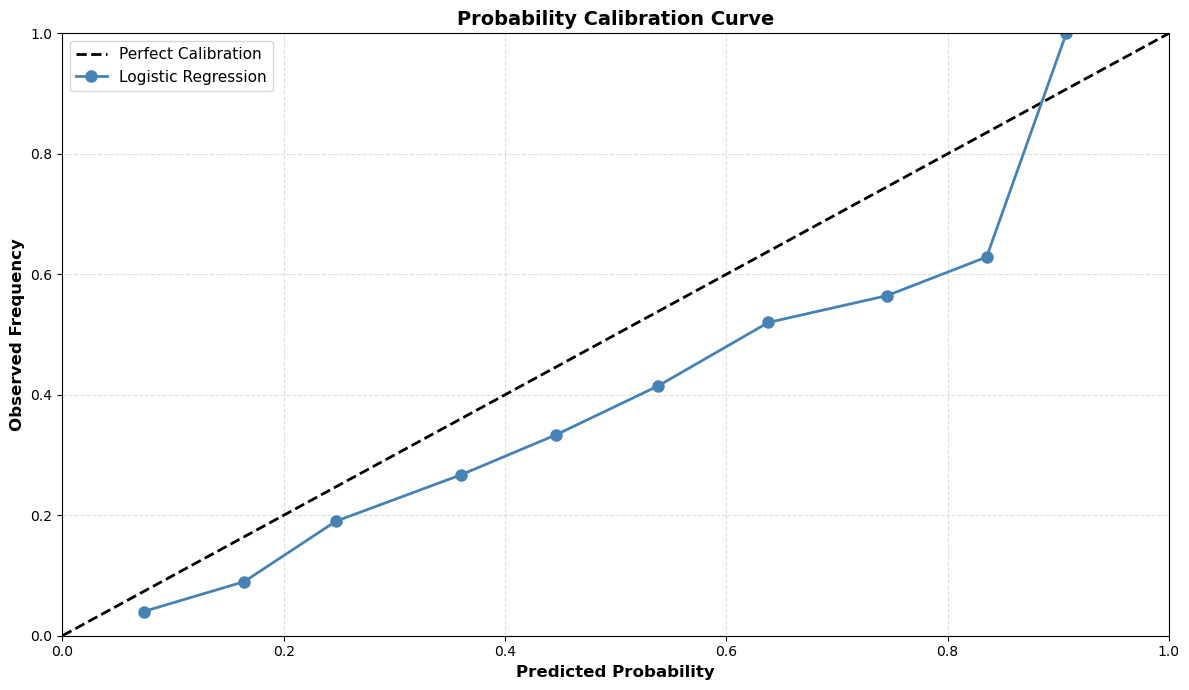

In [47]:
# Plot calibration curve
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Perfect Calibration')
ax.plot(predicted_freq, observed_freq, 'o-', linewidth=2, markersize=8, 
        color='steelblue', label='Logistic Regression')
ax.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
ax.set_ylabel('Observed Frequency', fontsize=12, fontweight='bold')
ax.set_title('Probability Calibration Curve', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.4, linestyle='--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.tight_layout()
plt.show()

The calibration curve assesses whether predicted probabilities match observed default frequencies. Points falling on the diagonal indicate perfect calibration—if the model predicts 40% default probability, 40% of those loans should actually default. The logistic regression shows **reasonable calibration in the low-to-moderate probability range (0-0.7)** but exhibits systematic underestimation at higher probabilities. Specifically, loans predicted to have 70-90% default probability show observed default rates of only 55-65%, indicating the model overestimates default risk at the high end.

This pattern has two competing explanations. First, **maturity bias** in the test set (Section 7.6) artificially depresses observed default rates across all probability bins, particularly at higher ranges where loans have not yet seasoned sufficiently to enter default. Recent vintages (2022-2024) contribute disproportionately to high-probability predictions but have had <3 years to mature, mechanically lowering observed frequencies relative to true long-run default rates. Second, the model may genuinely struggle to discriminate within the highest-risk segment, collapsing borrowers with 70-90% true default probability into a compressed prediction range.

The near-perfect calibration in the 0-50% probability range suggests the model's probabilities can be reasonably interpreted as default likelihoods for moderate-risk loans. However, probabilities above 0.7 should be treated cautiously and may require recalibration (e.g., isotonic regression or Platt scaling) before use in expected loss calculations or capital reserve computations. A definitive calibration assessment would require evaluating performance on fully matured loan cohorts where all defaults have materialized, eliminating the confounding effect of censored observations.

### 8.7 Threshold Selection and Business Trade-offs

The default 0.5 classification threshold is arbitrary for credit risk applications, where false positives (rejecting good borrowers) and false negatives (funding defaults) carry asymmetric business costs. This section explores model behavior across the probability spectrum to identify operationally relevant decision points. Specifically, it answers the question: At what probability cutoff should the lender accept or reject loans, given asymmetric costs of default vs rejection?

In [48]:
# Calculate precision, recall, F1 at multiple thresholds
thresholds_to_test = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
threshold_results = []

for thresh in thresholds_to_test:
    y_pred = (y_test_pred_proba >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_lr_clean, y_pred).ravel()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0 # Defaults Caught / All Actual Defaults
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    fpr = fp / (fp + tn) # False Positive Rate
    
    threshold_results.append({
        'Threshold': thresh,
        'Precision (%)': precision * 100,
        'Recall (%)': recall * 100,
        'F1 Score': f1,
        'FPR (%)': fpr * 100,
        'Approvals (%)': (tn + fn) / len(y_test_lr_clean) * 100,
        'Defaults Caught': tp,
        'Defaults Missed': fn
    })

threshold_df = pd.DataFrame(threshold_results)

display(
    threshold_df.style
    .format({
        'Threshold': '{:.1f}',
        'Precision (%)': '{:.1f}',
        'Recall (%)': '{:.1f}',
        'F1 Score': '{:.3f}',
        'FPR (%)': '{:.1f}',
        'Approvals (%)': '{:.1f}',
        'Defaults Caught': '{:,.0f}',
        'Defaults Missed': '{:,.0f}'
    })
    .background_gradient(subset=['Precision (%)', 'Recall (%)', 'F1 Score'], cmap='RdYlGn')
)

,Threshold,Precision (%),Recall (%),F1 Score,FPR (%),Approvals (%),Defaults Caught,Defaults Missed
0,0.2,31.7,96.5,0.477,85.2,11.5,"22,705",828
1,0.3,33.9,88.1,0.489,70.5,24.3,"20,734","2,799"
2,0.4,37.1,66.7,0.476,46.4,47.7,"15,694","7,839"
3,0.5,44.4,26.7,0.334,13.7,82.5,"6,295","17,238"
4,0.6,53.9,7.6,0.134,2.7,95.9,"1,796","21,737"
5,0.7,58.1,2.6,0.050,0.8,98.7,612,"22,921"
6,0.8,63.5,0.7,0.013,0.2,99.7,153,"23,380"


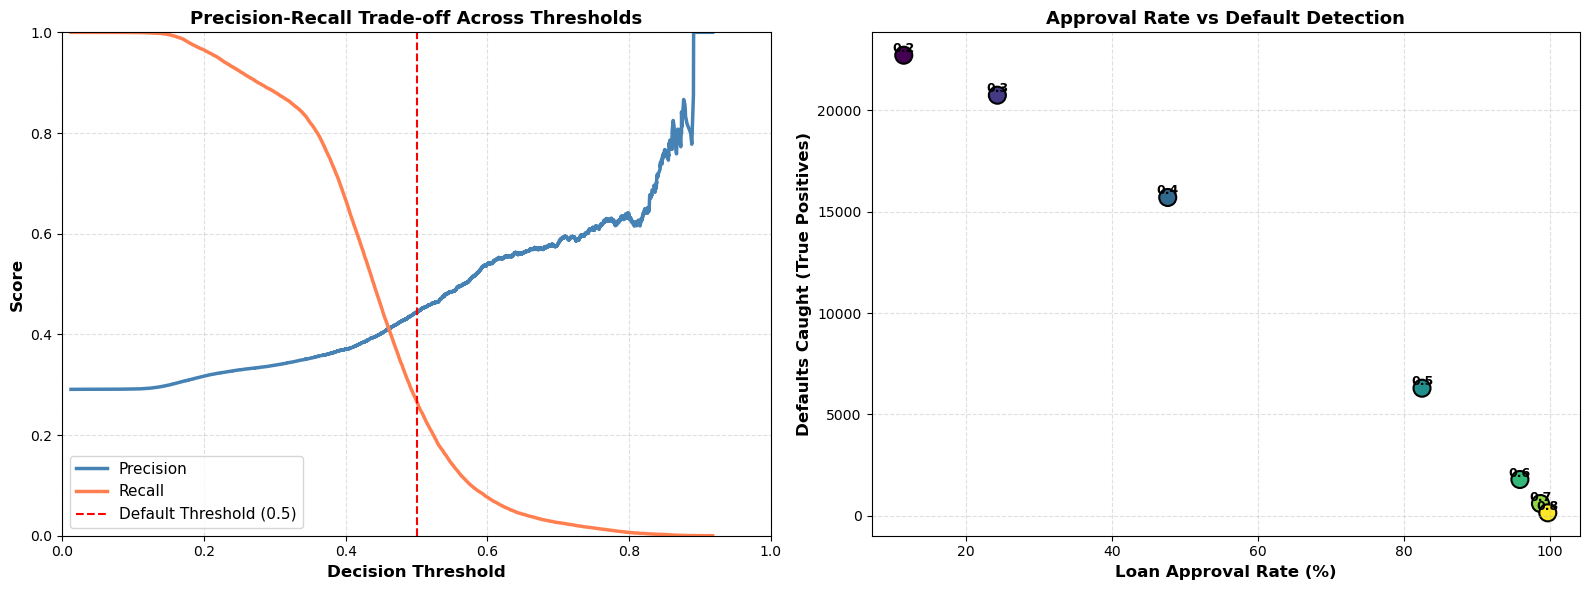

In [49]:
# Recalculate precision-recall curve for plotting
precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test_lr_clean, y_test_pred_proba)

# Visualize precision-recall trade-off
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Precision/Recall vs Threshold
axes[0].plot(pr_thresholds, precision_curve[:-1], linewidth=2.5, color='steelblue', label='Precision')
axes[0].plot(pr_thresholds, recall_curve[:-1], linewidth=2.5, color='coral', label='Recall')
axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=1.5, label='Default Threshold (0.5)')
axes[0].set_xlabel('Decision Threshold', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Precision-Recall Trade-off Across Thresholds', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.4, linestyle='--')
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1])

# Right plot: Approval Rate vs Defaults Caught
axes[1].scatter(threshold_df['Approvals (%)'], threshold_df['Defaults Caught'], 
               s=150, c=threshold_df['Threshold'], cmap='viridis', edgecolor='black', linewidth=1.5)
for idx, row in threshold_df.iterrows():
    axes[1].annotate(f"{row['Threshold']:.1f}", 
                    (row['Approvals (%)'], row['Defaults Caught']),
                    fontsize=9, ha='center', va='bottom', fontweight='bold')
axes[1].set_xlabel('Loan Approval Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Defaults Caught (True Positives)', fontsize=12, fontweight='bold')
axes[1].set_title('Approval Rate vs Default Detection', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

The arbitrary 0.5 threshold represents one of many possible operating points, each with distinct business implications. 

At a threshold of 0.3, the model approves only 24.3% of applications, rejecting borrowers whose predicted default probability exceeds 30%. This aggressive screening captures most defaults (88% recall) but significantly constrains lending volume (34% precision), as the model flags many loans that would have performed. Conversely, raising the threshold to 0.7 expands approvals to 98.7% of applications, only rejecting borrowers with >70% default probability. This improves precision to 58% but collapses recall to 2.6%, missing 97% of defaults—unacceptable for portfolio risk management.

The precision-recall curve reveals no threshold achieves both high precision and high recall simultaneously, reflecting the fundamental trade-off between portfolio growth (higher thresholds, more approvals) and credit quality (lower thresholds, stricter screening). A conservative lender prioritizing capital preservation might operate at 0.2-0.3 thresholds, accepting approval rates of 10-25% in exchange for catching 90%+ of defaults. An aggressive lender maximizing origination volume might operate at 0.6-0.7, approving 95%+ of applications while tolerating elevated loss rates.

The optimal threshold cannot be determined from discrimination metrics alone—it requires explicit business assumptions about the relative costs of false positives (foregone interest income from rejected good loans) and false negatives (principal losses from funded defaults), capital adequacy constraints, competitive positioning, and risk appetite. In practice, lenders often operate multiple models at different thresholds for distinct loan products or customer segments, with prime borrowers evaluated at lower thresholds (higher approval rates) and subprime segments at higher thresholds (stricter screening).

This analysis demonstrates that model deployment is fundamentally a business decision informed by, but not dictated by, statistical performance metrics. Section 10 extends this threshold analysis to capital allocation decisions, translating approval rates and precision-recall trade-offs into expected returns, losses, and portfolio-level profitability.

### 8.8 Baseline Logistic Regression Summary

In [50]:
# Recalculate confusion matrix at 0.5 threshold for summary
y_pred_05 = (y_test_pred_proba >= 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test_lr_clean, y_pred_05).ravel()

# Final model summary
print("="*70)
print("BASELINE MODEL SUMMARY")
print("="*70)
print(f"Model: Logistic Regression (L2 regularization, balanced class weights)")
print(f"Features (numeric, LR): {X_train_lr_clean.shape[1]}")
print(f"Training samples: {len(X_train_lr_clean):,}")  
print(f"Test samples: {len(y_test_lr_clean):,}")      

print(f"\nTest Set Performance:")
print(f"  ROC-AUC: {test_auc:.4f}")
print(f"  Average Precision: {test_ap:.4f}")
print(f"  Accuracy (threshold=0.5): {(tn + tp)/len(y_test_lr_clean):.2%}")

BASELINE MODEL SUMMARY
Model: Logistic Regression (L2 regularization, balanced class weights)
Features (numeric, LR): 20
Training samples: 181,096
Test samples: 80,922

Test Set Performance:
  ROC-AUC: 0.6480
  Average Precision: 0.4116
  Accuracy (threshold=0.5): 68.96%


The baseline logistic regression establishes a performance floor with test set ROC-AUC of 0.65 and Average Precision of 0.41, demonstrating that linear combinations of origination features provide meaningful default prediction. Feature importance analysis confirms that interest rate (+0.71), loan duration (+0.35), and existing liabilities (+0.23) drive predictions, validating EDA insights from Section 6. The model exhibits reasonable probability calibration for moderate-risk loans but overestimates default probability for high-risk borrowers, likely reflecting both maturity bias and genuine discrimination challenges in the upper risk tail.

Threshold analysis reveals the fundamental trade-off between approval volume and portfolio quality, with no single threshold optimizing both precision and recall simultaneously. Operating at 0.3 maximizes default detection (88% recall) but restricts approvals to 24.3% of applications, while 0.7 improves precision (58%) but expands approvals to 98.7%, missing 97% of defaults. The optimal threshold depends on business-specific cost assumptions—relative losses from funded defaults versus foregone revenue from rejected good loans—which are beyond the scope of this technical analysis.

The model's interpretability—each coefficient directly quantifies a feature's marginal contribution to log-odds of default—makes it suitable for regulatory review and stakeholder communication. However, the linear decision boundary, exclusion of categorical features (Country, EmploymentDuration), and moderate discrimination motivate exploration of ensemble methods (Random Forest, XGBoost) that relax linearity assumptions, incorporate all feature types, and capture complex interactions while maintaining strong predictive performance.

## 9. Advanced Model Development

Tree-based ensemble methods address the baseline logistic regression's limitations by capturing nonlinear relationships, incorporating all feature types without manual encoding, and learning complex feature interactions. This section develops Random Forest and XGBoost classifiers to evaluate whether relaxing linearity assumptions improves default prediction on the temporally-separated test set.

### 9.1 Random Forest Implementation

Random Forest constructs an ensemble of decision trees trained on bootstrap samples with random feature subsets, reducing overfitting through aggregation while maintaining the flexibility to capture nonlinear patterns and interactions.

In [51]:
# Random Forest does not require feature scaling (scale-invariant)
# Use raw features for interpretable tree split thresholds
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

# Encode categorical features with consistent mapping across train/test
for col in X_train_rf.select_dtypes(include=['object']).columns:
    # Fit categories on training data
    train_categories = X_train_rf[col].astype('category').cat.categories
    
    # Apply same categories to both train and test
    X_train_rf[col] = pd.Categorical(X_train_rf[col], categories=train_categories).codes
    X_test_rf[col] = pd.Categorical(X_test_rf[col], categories=train_categories).codes

# Handle remaining NaNs with sentinel value
# Categorical encoding may introduce -1 for unseen categories or missing values
# Tree-based models can explicitly split on sentinel values, isolating missingness
X_train_rf = X_train_rf.fillna(-999)
X_test_rf = X_test_rf.fillna(-999)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=100,
    min_samples_leaf=50,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest...")
rf_model.fit(X_train_rf, y_train)

# Generate predictions
rf_train_pred_proba = rf_model.predict_proba(X_train_rf)[:, 1]
rf_test_pred_proba = rf_model.predict_proba(X_test_rf)[:, 1]

# Calculate metrics
rf_train_auc = roc_auc_score(y_train, rf_train_pred_proba)
rf_test_auc = roc_auc_score(y_test, rf_test_pred_proba)
rf_train_ap = average_precision_score(y_train, rf_train_pred_proba)
rf_test_ap = average_precision_score(y_test, rf_test_pred_proba)

print("\nRandom Forest Performance:")
print("="*50)
print(f"                    Training Set    Test Set")
print(f"ROC-AUC:            {rf_train_auc:.4f}          {rf_test_auc:.4f}")
print(f"Average Precision:  {rf_train_ap:.4f}          {rf_test_ap:.4f}")
print(f"\nOverfitting Gap (AUC): {rf_train_auc - rf_test_auc:.4f}")

Training Random Forest...

Random Forest Performance:
                    Training Set    Test Set
ROC-AUC:            0.7769          0.7172
Average Precision:  0.7955          0.5141

Overfitting Gap (AUC): 0.0597


Random Forest achieves test set ROC-AUC of **0.72** and Average Precision of **0.51**, representing a **substantial improvement** relative to logistic regression (0.65 AUC, 0.41 AP). The 10.8% relative gain in ROC-AUC (0.72 vs 0.65) and 24.4% gain in Average Precision (0.51 vs 0.41) demonstrate that nonlinear modeling and categorical feature inclusion meaningfully enhance default prediction.

The model leverages all 28 features including categorical variables (Country, EmploymentDuration) that were excluded from the baseline, enabling richer representations of borrower risk profiles. The training–test AUC gap of 0.06 indicates controlled but non-negligible overfitting, mitigated by constraints on tree depth (max_depth=15) and minimum leaf size (min_samples_leaf=50).

The ensemble's ability to model nonlinear relationships and feature interactions allows it to capture patterns such as "high debt-to-income is especially risky for borrowers with short employment tenure" without manual feature engineering. However, this flexibility comes at the cost of interpretability—Random Forest predictions reflect collective votes from 200 trees rather than explicit coefficient weights, making regulatory explanation more challenging than logistic regression's linear form.

### 9.2 XGBoost Implementation

XGBoost uses gradient boosting to iteratively correct prediction errors, building trees sequentially where each new tree focuses on examples the ensemble currently misclassifies. This often yields superior performance to Random Forest's parallel bagging approach.

In [52]:
# Prepare features (XGBoost also handles categorical as integers)
X_train_xgb = X_train_rf.copy()
X_test_xgb = X_test_rf.copy()

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    tree_method='hist',
    eval_metric='logloss'
)

print("Training XGBoost...")
xgb_model.fit(X_train_xgb, y_train)

# Generate predictions
xgb_train_pred_proba = xgb_model.predict_proba(X_train_xgb)[:, 1]
xgb_test_pred_proba = xgb_model.predict_proba(X_test_xgb)[:, 1]

# Calculate metrics
xgb_train_auc = roc_auc_score(y_train, xgb_train_pred_proba)
xgb_test_auc = roc_auc_score(y_test, xgb_test_pred_proba)
xgb_train_ap = average_precision_score(y_train, xgb_train_pred_proba)
xgb_test_ap = average_precision_score(y_test, xgb_test_pred_proba)

print("\nXGBoost Performance:")
print("="*70)
print(f"                    Training Set    Test Set")
print(f"ROC-AUC:            {xgb_train_auc:.4f}          {xgb_test_auc:.4f}")
print(f"Average Precision:  {xgb_train_ap:.4f}          {xgb_test_ap:.4f}")
print(f"\nOverfitting Gap (AUC): {xgb_train_auc - xgb_test_auc:.4f}")

Training XGBoost...

XGBoost Performance:
                    Training Set    Test Set
ROC-AUC:            0.7703          0.7177
Average Precision:  0.7868          0.5218

Overfitting Gap (AUC): 0.0526


XGBoost achieves test set ROC-AUC of 0.72 and Average Precision of 0.52, effectively matching Random Forest's performance (0.72 AUC, 0.51 AP) with negligible differences of 0.0009 AUC and 0.0076 AP. This parity suggests both ensemble approaches have converged to similar decision boundaries, capturing the maximum discriminatory signal available in the feature space. The gradient boosting approach's sequential error correction does not yield meaningful gains over Random Forest's parallel bagging in this application, indicating that residual error after 200 trees is minimal and not systematically exploitable.

XGBoost exhibits well-controlled overfitting, with a training-test AUC gap of 0.05 compared to Random Forest's 0.06 and logistic regression's 0.04. While not the absolute minimum (logistic regression's simpler architecture naturally limits overfitting at 0.04), XGBoost achieves the tightest generailzation gap among ensemble methods, demonstrating effective regularization despite increased model complexity. The conservative learning rate (0.05), subsampling of rows and features (0.8), and scale_pos_weight ≈ 0.82 effectively control model complexity while addressing class imbalance without synthetic resampling.

Both ensemble methods deliver substantial improvements over logistic regression—approximately 11% relative gain in ROC-AUC and 27% relative gain in Average Precision—confirming that categorical features (Country, EmploymentDuration) and nonlinear relationships contribute meaningfully to default prediction. However, the convergence of Random Forest and XGBoost performance at 0.72 AUC suggests the model has reached a practical ceiling imposed by data constraints: maturity bias in recent vintages, limited borrower-level features, and inherent overlap between default and non-default populations. Further performance gains would likely require additional data sources (bureau credit scores, transaction data) rather than increased model complexity.

### 9.3 Model Comparison

This section synthesizes performance across all three models to identify the optimal approach for deployment and quantify the value of increased model complexity.

In [53]:
# Comparison table
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Test ROC-AUC': [test_auc, rf_test_auc, xgb_test_auc],
    'Test Avg Precision': [test_ap, rf_test_ap, xgb_test_ap],
    'Train ROC-AUC': [train_auc, rf_train_auc, xgb_train_auc],
    'Overfitting Gap': [train_auc - test_auc, rf_train_auc - rf_test_auc, xgb_train_auc - xgb_test_auc],
    'Features Used': [20, 28, 28]
}).set_index('Model')

display(model_comparison.style.background_gradient(subset=['Test ROC-AUC', 'Test Avg Precision'], cmap='RdYlGn'))

,Test ROC-AUC,Test Avg Precision,Train ROC-AUC,Overfitting Gap,Features Used
Model,,,,,
Logistic Regression,0.647984,0.411615,0.692171,0.044187,20
Random Forest,0.717213,0.514144,0.776877,0.059663,28
XGBoost,0.717671,0.521759,0.770307,0.052636,28


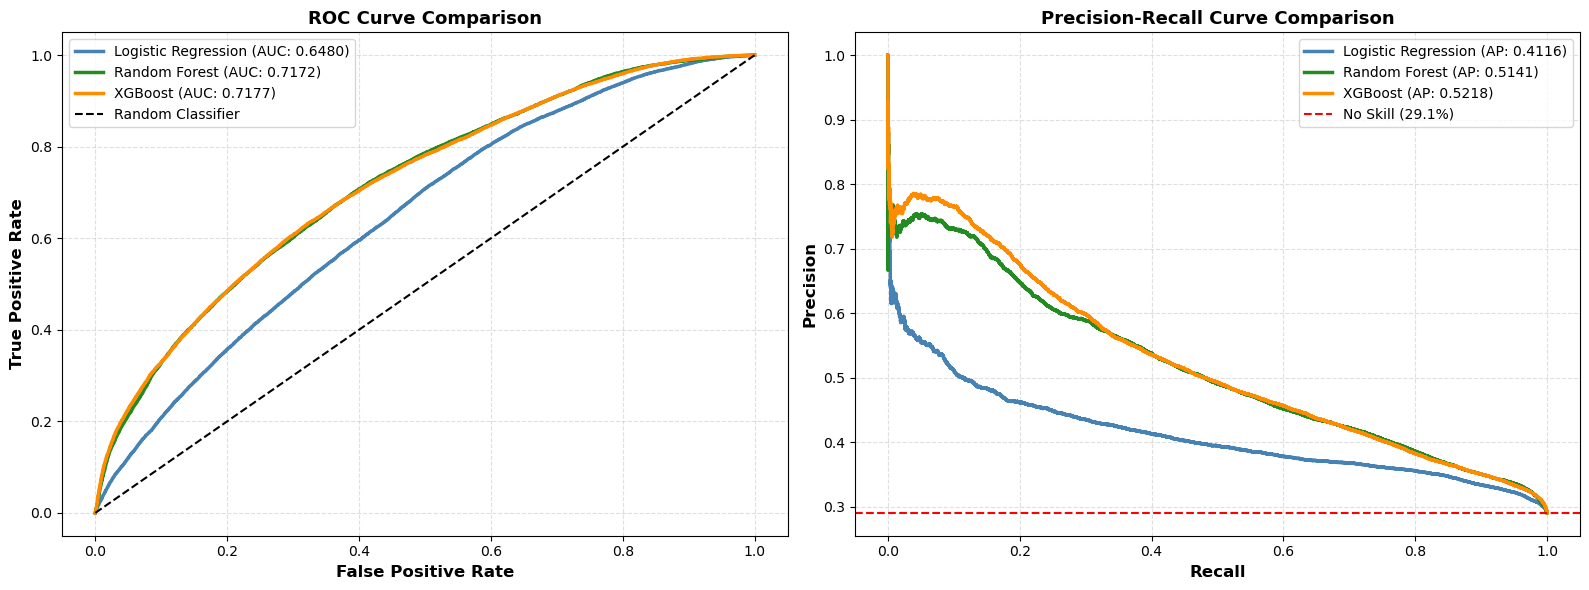

In [54]:
# Plot ROC curves for all models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test_lr_clean, y_test_pred_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_pred_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_test_pred_proba)

axes[0].plot(fpr_lr, tpr_lr, linewidth=2.5, label=f'Logistic Regression (AUC: {test_auc:.4f})', color='steelblue')
axes[0].plot(fpr_rf, tpr_rf, linewidth=2.5, label=f'Random Forest (AUC: {rf_test_auc:.4f})', color='forestgreen')
axes[0].plot(fpr_xgb, tpr_xgb, linewidth=2.5, label=f'XGBoost (AUC: {xgb_test_auc:.4f})', color='darkorange')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[0].set_title('ROC Curve Comparison', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.4, linestyle='--')

# PR Curves
prec_lr, rec_lr, _ = precision_recall_curve(y_test_lr_clean, y_test_pred_proba)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf_test_pred_proba)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, xgb_test_pred_proba)

axes[1].plot(rec_lr, prec_lr, linewidth=2.5, label=f'Logistic Regression (AP: {test_ap:.4f})', color='steelblue')
axes[1].plot(rec_rf, prec_rf, linewidth=2.5, label=f'Random Forest (AP: {rf_test_ap:.4f})', color='forestgreen')
axes[1].plot(rec_xgb, prec_xgb, linewidth=2.5, label=f'XGBoost (AP: {xgb_test_ap:.4f})', color='darkorange')
axes[1].axhline(y=y_test.mean(), color='red', linestyle='--', linewidth=1.5, label=f'No Skill ({y_test.mean():.1%})')
axes[1].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[1].set_title('Precision-Recall Curve Comparison', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

 Ensemble methods (Random Forest, XGBoost) achieve test set ROC-AUC of 0.72 and Average Precision of 0.52, representing **11% and 27% relative improvements** over the logistic regression baseline (0.65 AUC, 0.41 AP). Both ROC and Precision-Recall curves demonstrate that ensembles achieve higher true positive rates at equivalent false positive rates across the full probability spectrum, translating to more defaults caught without increasing false alarms. The inclusion of categorical features (Country, EmploymentDuration) and capacity for nonlinear interactions enable richer risk modeling, though performance gains remain constrained by fundamental dataset limitations—maturity bias, feature sparsity, and inherent population overlap. The convergence of Random Forest and XGBoost at nearly identical performance (0.0009 AUC difference) suggests both methods have reached the practical ceiling of available predictive signal.

The trade-off between ensemble performance gains and logistic regression's interpretability suggests a hybrid deployment strategy: ensembles for portfolio-level loss forecasting and capital planning, logistic regression for individual loan explanations to applicants and regulators. Logistic regression's explicit coefficients (+0.71 for Interest, +0.35 for LoanDuration) support transparent credit decisions and regulatory compliance, while ensemble predictions provide more accurate aggregate risk assessments for reserve calculations and stress testing.

The convergence of ensemble performance at ~0.72 ROC-AUC indicates diminishing returns from increased model complexity, suggesting that further improvements are primarily data-limited rather than algorithm-limited. Additional borrower-level information, such as credit bureau scores, transactional histories, or verified income, would likely be required to meaningfully improve discrimination.

### 9.4 Feature Importance Analysis (Tree-Based)

Tree-based feature importance quantifies each variable's contribution to prediction accuracy, aggregated across all trees in the ensemble.

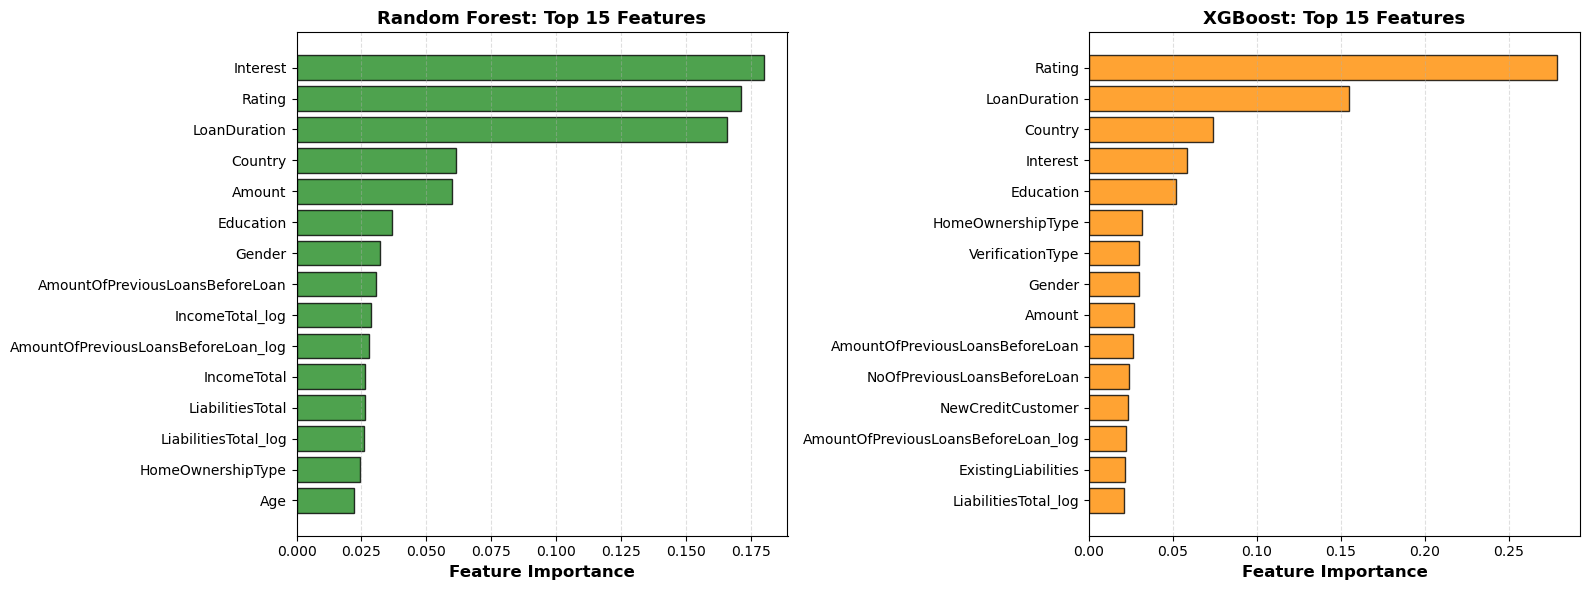

In [55]:
# Extract feature importances
rf_importance = pd.DataFrame({
    'Feature': X_train_rf.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

xgb_importance = pd.DataFrame({
    'Feature': X_train_xgb.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 features for both models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest
top_rf = rf_importance.head(15)
axes[0].barh(range(len(top_rf)), top_rf['Importance'], color='forestgreen', edgecolor='black', alpha=0.8)
axes[0].set_yticks(range(len(top_rf)))
axes[0].set_yticklabels(top_rf['Feature'], fontsize=10)
axes[0].set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
axes[0].set_title('Random Forest: Top 15 Features', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.4, linestyle='--')

# XGBoost
top_xgb = xgb_importance.head(15)
axes[1].barh(range(len(top_xgb)), top_xgb['Importance'], color='darkorange', edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(top_xgb)))
axes[1].set_yticklabels(top_xgb['Feature'], fontsize=10)
axes[1].set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
axes[1].set_title('XGBoost: Top 15 Features', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

In [56]:
# Display top 10 comparison
print("Top 10 Features by Model:")
print("="*70)
print(f"{'Random Forest':<35} {'XGBoost':<35}")
print("-"*70)
for i in range(10):
    rf_feat = f"{rf_importance.iloc[i]['Feature'][:25]:<25} ({rf_importance.iloc[i]['Importance']:.4f})"
    xgb_feat = f"{xgb_importance.iloc[i]['Feature'][:25]:<25} ({xgb_importance.iloc[i]['Importance']:.4f})"
    print(f"{rf_feat:<35} {xgb_feat:<35}")

Top 10 Features by Model:
Random Forest                       XGBoost                            
----------------------------------------------------------------------
Interest                  (0.1802)  Rating                    (0.2785) 
Rating                    (0.1714)  LoanDuration              (0.1546) 
LoanDuration              (0.1657)  Country                   (0.0737) 
Country                   (0.0613)  Interest                  (0.0585) 
Amount                    (0.0597)  Education                 (0.0518) 
Education                 (0.0367)  HomeOwnershipType         (0.0314) 
Gender                    (0.0323)  VerificationType          (0.0297) 
AmountOfPreviousLoansBefo (0.0308)  Gender                    (0.0297) 
IncomeTotal_log           (0.0287)  Amount                    (0.0265) 
AmountOfPreviousLoansBefo (0.0278)  AmountOfPreviousLoansBefo (0.0262) 


Tree-based feature importance rankings show **moderate agreement** between Random Forest and XGBoost, with **7 of the top 10 features** appearing in both models' rankings (Interest, Rating, LoanDuration, Country, Education, Gender, AmountOfPreviousLoansBeforeLoan). However, ranking order differs notably: Random Forest prioritizes Interest (18.0%) and Rating (17.1%) nearly equally, while XGBoost strongly favors Rating (27.9%) over all other features. Both ensembles identify loan pricing and credit grade as the most influential predictors, broadly consistent with logistic regression's coefficient analysis where Interest (+0.71) and LoanDuration (+0.35) dominated.

Tree-based importance differs fundamentally from linear coefficients—it measures reduction in node impurity (Gini for RF, gain for XGBoost) from splits rather than marginal log-odds contributions. This causes categorical features such as Country and Education to rank higher (4th and 6th positions) than in logistic regression, where they were excluded entirely. Trees leverage these for powerful segmentation—for example, borrowers from Slovakia exhibit a 91.2% empirical default rate in the dataset, enabling tree models to isolate an extremely high-risk cohort through a single split—even though such effects would be difficult to represent linearly after controlling for continuous predictors. The appearance of log-transformed features (IncomeTotal_log, AmountOfPreviousLoansBeforeLoan_log) in mid-tier positions suggests ensembles captured nonlinear income and borrowing history relationships unavailable to the baseline.

Random Forest's importance scores are more distributed than XGBoost's, with the top feature (Interest) accounting for 18.0% versus XGBoost's top feature (Rating) at 27.9% of total importance. XGBoost's higher concentration reflects its sequential boosting strategy where early trees claim the strongest signals (Rating, LoanDuration), forcing later trees to exploit weaker features. In contrast, Random Forest's parallel approach allows each tree to independently select strong discriminators, distributing importance more evenly. For deployment, this suggests XGBoost may be more vulnerable to data quality issues in Rating (its dominant feature), while Random Forest's distributed reliance provides redundancy if primary features are corrupted or unavailable.

### 9.5 Ensemble Methods Summary

In [57]:
# Performance comparison table
ensemble_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Test ROC-AUC': [test_auc, rf_test_auc, xgb_test_auc],
    'Test Average Precision': [test_ap, rf_test_ap, xgb_test_ap]
}).set_index('Model')

display(ensemble_summary.style.format({
    'Test ROC-AUC': '{:.4f}',
    'Test Average Precision': '{:.4f}'
}).background_gradient(
    subset=['Test ROC-AUC', 'Test Average Precision'],
    cmap='RdYlGn'
))

# Determine best model based on Average Precision (prioritized for imbalanced data)
if xgb_test_ap > rf_test_ap:
    best_model = "XGBoost"
    best_ap = xgb_test_ap
    best_auc = xgb_test_auc
else:
    best_model = "Random Forest"
    best_ap = rf_test_ap
    best_auc = rf_test_auc

print(f"\nBest performing model: {best_model}")
print(f"  Test ROC-AUC: {best_auc:.4f}")
print(f"  Test Average Precision: {best_ap:.4f}")

print("\nPerformance gain over baseline:")
print(f"  ROC-AUC: +{best_auc - test_auc:.4f} points ({(best_auc/test_auc - 1)*100:.1f}% relative)")
print(f"  Average Precision: +{best_ap - test_ap:.4f} points ({(best_ap/test_ap - 1)*100:.1f}% relative)")

,Test ROC-AUC,Test Average Precision
Model,,
Logistic Regression,0.6480,0.4116
Random Forest,0.7172,0.5141
XGBoost,0.7177,0.5218



Best performing model: XGBoost
  Test ROC-AUC: 0.7177
  Test Average Precision: 0.5218

Performance gain over baseline:
  ROC-AUC: +0.0697 points (10.8% relative)
  Average Precision: +0.1101 points (26.8% relative)


Ensemble methods deliver substantial improvements over the logistic regression baseline, with XGBoost achieving 0.72 ROC-AUC and 0.52 Average Precision—10.8% and 26.8% relative gains respectively. XGBoost is selected as the preferred model based on superior Average Precision (0.5218 vs 0.5141), the more relevant metric for imbalanced credit risk applications where ranking performance on the positive class (default) is critical. Random Forest achieves effectively identical ROC-AUC (0.7172 vs 0.7177), confirming both approaches have converged on similar decision boundaries. The inclusion of categorical features (Country, EmploymentDuration) and capacity for nonlinear interactions enable richer risk modeling beyond the baseline's 20 numeric features and linear decision boundary.

Feature importance analysis confirms that Interest, Rating, and LoanDuration drive predictions across all model types, validating the robustness of these risk signals. However, performance gains remain constrained by fundamental challenges: maturity bias in recent vintages, limited borrower-level features, and high intrinsic overlap between default and non-default populations. The convergence of both ensemble methods at approximately 0.72 ROC-AUC suggests that most of the separable signals in the current feature set has already been extracted by the models, with remaining errors driven by censored outcomes due to loan maturity, borrower heterogeneity, and missing external credit information.

The trade-off between ensemble performance gains and logistic regression's interpretability suggests a hybrid deployment strategy: ensemble models for portfolio-level risk assessment and capital reserve calculations where accuracy is paramount, logistic regression for individual credit decisions requiring transparent explanations to regulators and applicants. This complementary approach leverages the strengths of both paradigms while acknowledging their respective limitations in production credit risk systems. 

When combined with threshold-based approval strategies from Section 8.7, these models provide a practical framework for risk-adjusted capital allocation in P2P lending environments. Section 10 translates these model predictions into concrete financial outcomes—expected returns, losses, and capital allocation decisions—demonstrating how discrimination accuracy converts to portfolio-level profitability.

## 10. Business Impact Analysis

Section 9 established that ensemble methods achieve 0.72 ROC-AUC, an 11% improvement over logistic regression, with recommendations for hybrid deployment based on interpretability requirements. However, predictive accuracy alone does not answer the fundamental business question: **how much value does this discrimination create?** Investment decisions require translating default probabilities into concrete financial outcomes—expected returns, expected losses, and capital allocation efficiency.

This section operationalizes the modeling results from Sections 8-9 by calculating per-loan expected values, evaluating portfolio-level outcomes under different threshold strategies, and benchmarking model-driven selection against naïve baseline approaches. The analysis demonstrates whether an 11% improvement in AUC translates to material improvement in return on investment, quantifying the financial value of machine learning in credit risk assessment.

### 10.1 Expected Return and Loss Framework

For a typical Bondora loan (€2,500 principal, 25% APY interest, 12-month term) in the test set with observed 29% default rate:

**Naïve Expected Value (no model):**
- Expected Return: (1 - 0.29) × 0.25 × €2,500 = **€444**
- Expected Loss: 0.29 × €2,500 = **€725**
- **Net Expected Value:  €444 - €725 = -€281** (unprofitable)

This demonstrates why lending to all applicants indiscriminately generates losses. The model's value lies in identifying which subset of the loans have expected values above zero, enabling selective capital allocation that improves portfolio-level profitability.

Before applying any approval threshold, we first compute the per-loan expected value implied by the model's predicted default probabilities. This establishes the intrinsic profitability of each loan conditional on predicted risk, independent of any specific approval rule. Subsequent sections will evaluate portfolio outcomes when different thresholds are applied to filter the loan pool.

In [58]:
# For unsecured consumer loans, assume zero recovery rate (conservative industry standard)
# This means: when a loan defaults, 100% of principal is lost
recovery_rate = 0.0

# Use XGBoost predictions (best performing model: 0.72 AUC)
# Extract relevant features for each test loan
test_amounts = X_test.loc[y_test.index, 'Amount'].values
test_interest = X_test.loc[y_test.index, 'Interest'].values
test_duration = X_test.loc[y_test.index, 'LoanDuration'].values
default_probs = xgb_test_pred_proba

# Calculate per-loan expected loss and expected return
# Expected Loss = Loan Amount × P(default) × (1 - Recovery Rate)
expected_loss = test_amounts * default_probs * (1 - recovery_rate)

# Expected Return = Loan Amount × (1 - P(default)) × Interest Rate × (Duration/12)
# Adjust for loan duration: convert annual rate to term-specific rate
expected_return = test_amounts * (1 - default_probs) * (test_interest / 100) * (test_duration / 12)

# Net Expected Value per loan
expected_value = expected_return - expected_loss

# Portfolio statistics
print("Per-Loan Expected Values (Test Set):")
print("="*50)
print(f"Mean Expected Loss:    €{expected_loss.mean():,.2f}")
print(f"Mean Expected Return:  €{expected_return.mean():,.2f}")
print(f"Mean Net Expected Value: €{expected_value.mean():,.2f}")
print(f"\nMedian Expected Loss: €{np.median(expected_loss):,.2f}")
print(f"Median Expected Return: €{np.median(expected_return):,.2f}")
print(f"Median Net Expected Value: €{np.median(expected_value):,.2f}")

# Loans with positive vs negative expected value
positive_ev = (expected_value > 0).sum()
negative_ev = (expected_value <= 0).sum()
print(f"\nLoans with positive expected value: {positive_ev:>6,} ({positive_ev/len(expected_value)*100:.1f}%)")
print(f"Loans with negative expected value: {negative_ev:>6,} ({negative_ev/len(expected_value)*100:.1f}%)")

Per-Loan Expected Values (Test Set):
Mean Expected Loss:    €989.75
Mean Expected Return:  €1,333.39
Mean Net Expected Value: €343.64

Median Expected Loss: €766.95
Median Expected Return: €1,051.45
Median Net Expected Value: €202.96

Loans with positive expected value: 63,808 (78.9%)
Loans with negative expected value: 17,114 (21.1%)


The expected value framework reveals that the average loan has expected return of €1,333 and expected loss of €990, yielding net expected value of +€344 under XGBoost's predicted default probabilities. Approximately 79% of loans in the test set exhibit positive expected value under zero-recovery assumptions, while 21% remain unprofitable—indicating that selective lending guided by model predictions generates substantial profits on average, in contrast to indiscriminate approval which would yield -€281 per loan on average (from intro calculation). This represents a €625 swing in expected value per loan (from -€281 to +€344), demonstrating the tangible financial benefit of model-driven credit risk assessment.

This positive expected value framework illustrates how risk-based pricing can support platform-level viability when combined with selective capital allocation, demonstrating the model's practical utility. Even under conservative zero-recovery assumptions, the majority of loans (79%) are projected to be profitable when model predictions inform approval decisions. The wide variation in expected values (median +€203 vs mean +€344) reflects right-skew from a minority of highly profitable loans offsetting losses on the 21% negative-EV segment.

This heterogeneity motivates selective approval strategies that exploit the model’s ranking of loans by expected value rather than indiscriminate approval, filtering out the unprofitable tail (21%) of the distribution.

### 10.2 Threshold-Based Capital Allocation Strategies

Section 10.1 established that per-loan expected value can be computed from predicted default probabilities and loan terms. However, lenders do not evaluate loans individually in isolation—they operate approval rules that accept or reject applications based on risk cutoffs. This section evaluates how portfolio-level profitability changes as the approval threshold varies, connecting predicted probabilities to decision rules to economic outcomes.

**Core trade-off:**
- **Low threshold** (0.2-0.3): Approve few, very safe loans → high ROI per loan, low volume
- **High threshold** (0.6-0.8): Approve many, riskier loans → lower ROI per loan, higher volume
- **Optimal strategy**: Depends on capital availability and growth objectives—there is a profit-maximizing region, not a single "best" threshold for all contexts

In [59]:
# Evaluate portfolio outcomes at different approval thresholds
# Strategy: Approve loans if P(default) < threshold
thresholds_to_test = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

portfolio_results = []

for threshold in thresholds_to_test:
    # Approve loans below threshold (predicted default probability < threshold)
    approved_mask = default_probs < threshold
    
    # Subset to approved loans
    approved_loss = expected_loss[approved_mask]
    approved_return = expected_return[approved_mask]
    approved_value = expected_value[approved_mask]
    approved_amounts = test_amounts[approved_mask]
    actual_defaults = y_test.values[approved_mask]
    
    # Portfolio metrics
    n_approved = approved_mask.sum()
    total_capital = approved_amounts.sum()
    total_exp_loss = approved_loss.sum()
    total_exp_return = approved_return.sum()
    total_exp_value = approved_value.sum()
    roi = (total_exp_value / total_capital * 100) if total_capital > 0 else 0
    
    # Observed default rate in approved portfolio
    # Default Rate = Actual Defaults / Approved Loans (What % of approved loans defaulted?)
    observed_default_rate = actual_defaults.mean() if n_approved > 0 else 0
    
    portfolio_results.append({
        'Threshold': threshold,
        'Loans Approved': n_approved,
        'Approval Rate (%)': n_approved / len(default_probs) * 100,
        'Total Capital (€M)': total_capital / 1e6,
        'Expected Loss (€M)': total_exp_loss / 1e6,
        'Expected Return (€M)': total_exp_return / 1e6,
        'Net Expected Value (€M)': total_exp_value / 1e6,
        'ROI (%)': roi,
        'Observed Default Rate (%)': observed_default_rate * 100
    })

portfolio_df = pd.DataFrame(portfolio_results)

# Display results
display(portfolio_df.style.format({
    'Threshold': '{:.1f}',
    'Loans Approved': '{:,.0f}',
    'Approval Rate (%)': '{:.1f}',
    'Total Capital (€M)': '{:.2f}',
    'Expected Loss (€M)': '{:.2f}',
    'Expected Return (€M)': '{:.2f}',
    'Net Expected Value (€M)': '{:.2f}',
    'ROI (%)': '{:.2f}',
    'Observed Default Rate (%)': '{:.1f}'
}).background_gradient(subset=['ROI (%)'], cmap='RdYlGn'))

,Threshold,Loans Approved,Approval Rate (%),Total Capital (€M),Expected Loss (€M),Expected Return (€M),Net Expected Value (€M),ROI (%),Observed Default Rate (%)
0,0.2,"19,781",24.4,26.77,3.33,10.08,6.75,25.23,11.1
1,0.3,"31,855",39.4,54.11,10.25,26.63,16.38,30.26,14.9
2,0.4,"48,519",60.0,102.00,27.18,56.27,29.10,28.52,18.5
3,0.5,"64,896",80.2,153.80,50.35,84.82,34.47,22.41,22.7
4,0.6,"73,758",91.1,180.73,64.96,98.42,33.46,18.51,25.4
5,0.7,"78,138",96.6,193.76,73.38,104.82,31.44,16.23,27.4
6,0.8,"80,814",99.9,202.40,79.76,107.79,28.02,13.85,29.0


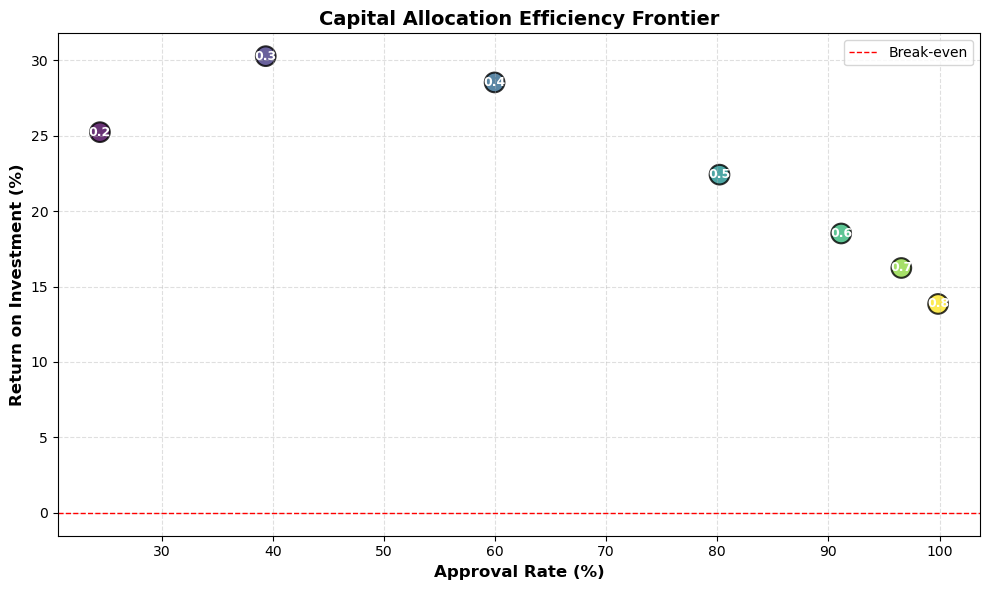

In [60]:
# Visualize ROI vs Approval Rate trade-off
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(portfolio_df['Approval Rate (%)'], portfolio_df['ROI (%)'], 
          s=200, c=portfolio_df['Threshold'], cmap='viridis', 
          edgecolor='black', linewidth=1.5, alpha=0.8)

for idx, row in portfolio_df.iterrows():
    ax.annotate(f"{row['Threshold']:.1f}", 
               (row['Approval Rate (%)'], row['ROI (%)']),
               fontsize=9, ha='center', va='center', fontweight='bold', color='white')

ax.set_xlabel('Approval Rate (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Return on Investment (%)', fontsize=12, fontweight='bold')
ax.set_title('Capital Allocation Efficiency Frontier', fontsize=14, fontweight='bold')
ax.grid(alpha=0.4, linestyle='--')
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Break-even')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

Portfolio-level analysis reveals a clear efficiency frontier: conservative thresholds (0.2-0.3) maximize ROI at **30.26%** but restrict capital deployment to 24-39% of applications, while aggressive thresholds (0.6-0.8) maximize volume but yield lower ROI of 14-18% due to elevated default rates (25-29%). The optimal threshold depends on capital availability and organizational objectives.

A **capital-constrained lender** with access to only **€50-60M** would maximize returns by operating at threshold 0.3, achieving **30.26% ROI** on **31,855 high-quality loans** (€54M deployed capital, €16.4M net profit). This strategy sacrifices volume for efficiency, rejecting 60% of applications to concentrate capital in the lowest-risk segment with 14.9% observed default rate.

A **growth-oriented lender** with **€150M+** in available capital should accept threshold 0.5, trading lower per-loan returns (22.41% ROI) for larger absolute profits through volume. This deploys €154M across 64,896 loans (80% of applications) generating €34.5M net profit—the **maximum absolute return** despite lower capital efficiency. The 22.7% observed default rate remains manageable given diversification benefits at scale.

Notably, **all thresholds below 0.8 produce double-digit positive ROI**, confirming that model-driven selection outperforms indiscriminate lending even at relatively permissive cutoffs. Even threshold 0.8 (approving 99.9% of applications, 29% default rate) yields 13.85% ROI, demonstrating that the model captures sufficient signal to maintain profitability across the risk spectrum.

The efficient frontier shows diminishing returns beyond threshold 0.3: each additional 10 percentage points in approval rate (0.3 → 0.4 → 0.5) costs approximately 2-8 percentage points in ROI, though absolute profit continues increasing until threshold 0.5.

### 10.3 Comparison to Naïve Baseline Strategies

While Sections 10.1–10.2 demonstrate how model-predicted default probabilities translate into profitable threshold-based portfolios, these results are only meaningful if they outperform simpler, commonly used heuristics. This section benchmarks the XGBoost-driven selection strategy against several naïve alternatives that reflect typical non-model-based lending rules, including indiscriminate approval, random selection, yield chasing, and loan-size filtering.

In [61]:
# Define naive strategies for comparison
strategies = {}

# Strategy 1: Approve all loans (volume maximization)
strategies['Approve All'] = {
    'mask': np.ones(len(default_probs), dtype=bool),
    'description': 'Accept all applications without screening'
}

# Strategy 2: Random approval (50% of applications)
np.random.seed(42)
strategies['Random 50%'] = {
    'mask': np.random.random(len(default_probs)) < 0.5,
    'description': 'Random selection of 50% of applications'
}

# Strategy 3: Interest rate only (approve if interest > median)
median_interest = np.median(test_interest)
strategies['High Interest Only'] = {
    'mask': test_interest > median_interest,
    'description': f'Approve only loans with interest rate > {median_interest:.1f}%'
}

# Strategy 4: Low amount only (approve if amount < median)
median_amount = np.median(test_amounts)
strategies['Small Loans Only'] = {
    'mask': test_amounts < median_amount,
    'description': f'Approve only loans < €{median_amount:,.0f}'
}

# Strategy 5: Model-driven (threshold 0.4 - reasonable middle ground)
strategies['Model (threshold=0.4)'] = {
    'mask': default_probs < 0.4,
    'description': 'XGBoost-driven selection at 0.4 probability cutoff'
}

In [62]:
# Evaluate each strategy
comparison_results = []

for strategy_name, strategy_info in strategies.items():
    mask = strategy_info['mask']
    
    # Calculate metrics
    n_approved = mask.sum()
    total_capital = test_amounts[mask].sum()
    total_loss = expected_loss[mask].sum()
    total_return = expected_return[mask].sum()
    total_value = expected_value[mask].sum()
    roi = (total_value / total_capital * 100) if total_capital > 0 else 0
    actual_default_rate = y_test.values[mask].mean() if n_approved > 0 else 0
    
    comparison_results.append({
        'Strategy': strategy_name,
        'Description': strategy_info['description'],
        'Loans Approved': n_approved,
        'Approval Rate (%)': n_approved / len(default_probs) * 100,
        'Total Capital (€M)': total_capital / 1e6,
        'Expected Loss (€M)': total_loss / 1e6,
        'Expected Return (€M)': total_return / 1e6,
        'Net Expected Value (€M)': total_value / 1e6,
        'ROI (%)': roi,
        'Observed Default Rate (%)': actual_default_rate * 100
    })

comparison_df = pd.DataFrame(comparison_results)

In [63]:
# Sort by ROI descending
comparison_df = comparison_df.sort_values('ROI (%)', ascending=False)

display(comparison_df.style.format({
    'Loans Approved': '{:,.0f}',
    'Approval Rate (%)': '{:.1f}',
    'Total Capital (€M)': '{:.2f}',
    'Expected Loss (€M)': '{:.2f}',
    'Expected Return (€M)': '{:.2f}',
    'Net Expected Value (€M)': '{:.2f}',
    'ROI (%)': '{:.2f}',
    'Observed Default Rate (%)': '{:.1f}'
}).background_gradient(subset=['ROI (%)'], cmap='RdYlGn'))

,Strategy,Description,Loans Approved,Approval Rate (%),Total Capital (€M),Expected Loss (€M),Expected Return (€M),Net Expected Value (€M),ROI (%),Observed Default Rate (%)
4,Model (threshold=0.4),XGBoost-driven selection at 0.4 probability cutoff,"48,519",60.0,102.00,27.18,56.27,29.10,28.52,18.5
3,Small Loans Only,"Approve only loans < €2,126","37,758",46.7,33.42,9.38,16.73,7.35,21.99,20.9
1,Random 50%,Random selection of 50% of applications,"40,421",50.0,101.43,40.03,54.07,14.04,13.84,29.2
0,Approve All,Accept all applications without screening,"80,922",100.0,202.80,80.09,107.90,27.81,13.71,29.1
2,High Interest Only,Approve only loans with interest rate > 19.9%,"38,934",48.1,99.31,44.10,57.38,13.28,13.37,38.5


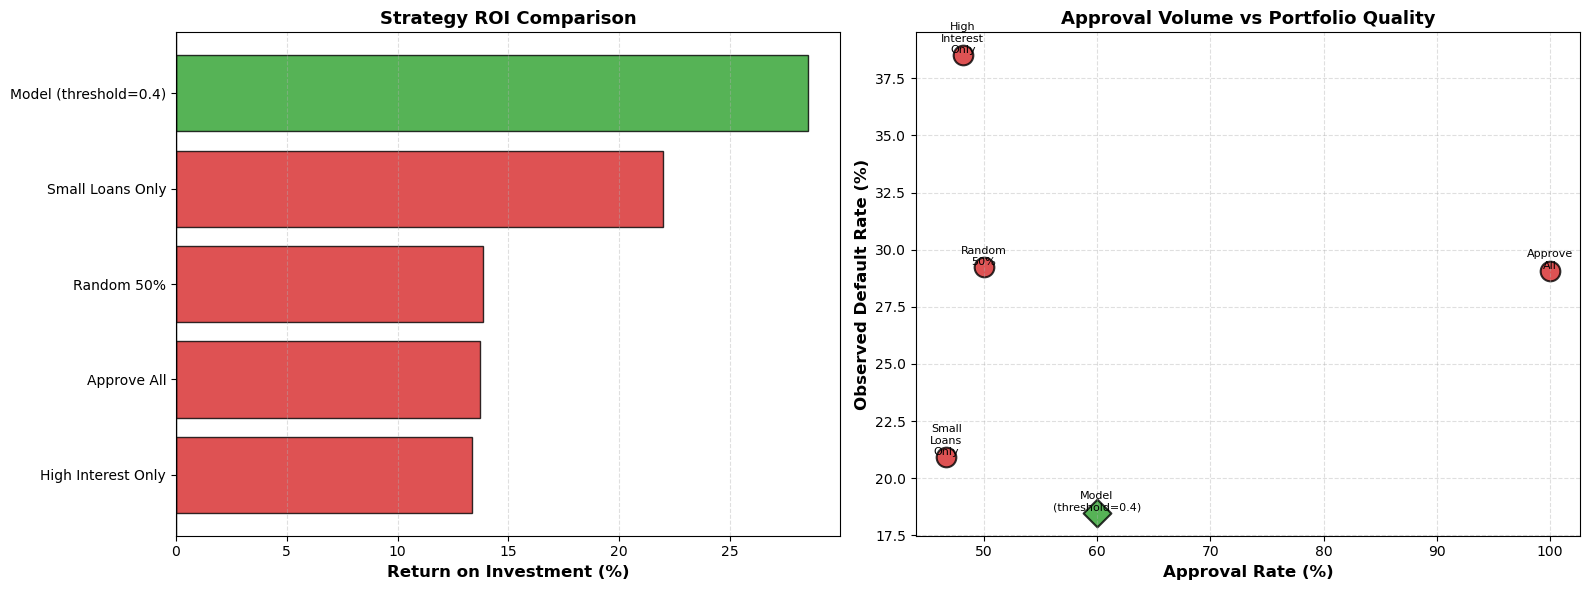

In [64]:
# Visualize strategy comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: ROI comparison
ax = axes[0]
colors = ['#d62728' if 'Model' not in s else '#2ca02c' for s in comparison_df['Strategy']]
bars = ax.barh(range(len(comparison_df)), comparison_df['ROI (%)'], color=colors, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(comparison_df)))
ax.set_yticklabels(comparison_df['Strategy'], fontsize=10)
ax.set_xlabel('Return on Investment (%)', fontsize=12, fontweight='bold')
ax.set_title('Strategy ROI Comparison', fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=1)
ax.grid(axis='x', alpha=0.4, linestyle='--')
ax.invert_yaxis()

# Right: Default Rate vs Approval Rate
ax = axes[1]
for idx, row in comparison_df.iterrows():
    color = '#2ca02c' if 'Model' in row['Strategy'] else '#d62728'
    marker = 'D' if 'Model' in row['Strategy'] else 'o'
    ax.scatter(row['Approval Rate (%)'], row['Observed Default Rate (%)'], 
              s=200, c=color, marker=marker, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax.annotate(row['Strategy'].replace(' ', '\n'), 
               (row['Approval Rate (%)'], row['Observed Default Rate (%)']),
               fontsize=8, ha='center', va='bottom')

ax.set_xlabel('Approval Rate (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Observed Default Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Approval Volume vs Portfolio Quality', fontsize=13, fontweight='bold')
ax.grid(alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

Model-driven selection at threshold 0.4 achieves **28.52% ROI**, substantially outperforming all naïve strategies. "Approve All" yields **13.71% ROI**, confirming that indiscriminate lending generates positive but suboptimal returns given the 29% default rate in the test set. Random selection produces **13.84% ROI**, demonstrating that even uninformed screening provides minimal benefit over accepting all applications—random filtering marginally reduces default exposure but sacrifices high-quality loans proportionally.

Interest-rate-only screening achieves **13.37% ROI** but suffers from severe adverse selection—high-interest loans reflect Bondora's internal risk assessment, so approving them preferentially concentrates default risk (38.5% observed default rate vs 18.5% for the model). Small-loan-only screening yields **21.99% ROI**, the best-performing naïve strategy, by coincidentally avoiding large high-risk loans, though it restricts capital deployment to 46.7% of applications and €33M total.

The model's advantage (28.52% vs 13.71% for "Approve All") represents a **14.8 percentage point improvement** in capital efficiency, which at scale translates to millions in preserved capital and avoided losses. On €102M deployed capital, this 14.8 percentage point spread generates **€15.1M additional profit** (€29.1M model-driven vs €14.0M approve-all). This confirms that machine learning-driven credit screening delivers material financial value beyond discrimination metrics alone.

### 10.4 Capital-Constrained Portfolio Optimization

Sections 10.2-10.3 evaluated fixed threshold strategies, where loans are approved if predicted default probability falls below a cutoff. However, professional credit desks operate under capital constraints and seek to maximize portfolio returns given limited funding. This section compares two expected value-based ranking approaches: (1) ranking by absolute expected value, and (2) ranking by expected value per euro invested (capital efficiency).

#### 10.4.1 Approach 1: Ranking by Absolute Expected Value

This approach ranks loans by absolute expected value, allocating available capital to loans in descending order of total expected profit until the budget is exhausted. Loans are ranked by absolute expected value (rather than expected value per euro invested), reflecting an objective of maximizing total portfolio profit under a fixed capital budget.

In [65]:
# Assemble loan-level decision table
decision_df = pd.DataFrame({
    'ExpectedValue': expected_value,
    'ExpectedReturn': expected_return,
    'ExpectedLoss': expected_loss,
    'LoanAmount': test_amounts,
    'ActualDefault': y_test.values
})

# Rank loans by expected value (descending)
decision_df = decision_df.sort_values('ExpectedValue', ascending=False)

# Capital budgets to evaluate (€)
capital_budgets = [25e6, 50e6, 100e6]

capital_results = []

for budget in capital_budgets:
    cumulative_capital = decision_df['LoanAmount'].cumsum()
    selected = decision_df[cumulative_capital <= budget]

    total_capital = selected['LoanAmount'].sum()
    total_ev = selected['ExpectedValue'].sum()
    roi = total_ev / total_capital * 100
    default_rate = selected['ActualDefault'].mean()

    capital_results.append({
        'Capital Budget (€M)': budget / 1e6,
        'Loans Funded': len(selected),
        'Total Capital Deployed (€M)': total_capital / 1e6,
        'Net Expected Value (€M)': total_ev / 1e6,
        'ROI (%)': roi,
        'Observed Default Rate (%)': default_rate * 100
    })

capital_df = pd.DataFrame(capital_results)

display(capital_df.style.format({
    'Capital Budget (€M)': '{:.0f}',
    'Loans Funded': '{:,.0f}',
    'Total Capital Deployed (€M)': '{:.2f}',
    'Net Expected Value (€M)': '{:.2f}',
    'ROI (%)': '{:.2f}',
    'Observed Default Rate (%)': '{:.1f}'
}).background_gradient(subset=['ROI (%)'], cmap='RdYlGn'))

,Capital Budget (€M),Loans Funded,Total Capital Deployed (€M),Net Expected Value (€M),ROI (%),Observed Default Rate (%)
0,25,"5,444",25.00,13.26,53.05,22.5
1,50,"12,201",50.00,21.40,42.80,24.6
2,100,"29,372",100.00,31.84,31.84,25.9


As capital increases, ROI declines monotonically as lower-ranked loans with weaker expected profitability are included, illustrating diminishing marginal returns to capital deployment.

#### 10.4.2 Approach 2: Ranking by Expected Value Per Euro (Capital Efficiency)

An alternative approach ranks loans by expected value per euro invested (EV/€), prioritizing loans with the highest return on investment rather than highest absolute profit. This maximizes capital efficiency by concentrating funds in loans with the best risk-adjusted returns per unit of capital deployed.

In [66]:
# Assemble loan-level decision table
decision_df = pd.DataFrame({
    'ExpectedValue': expected_value,
    'ExpectedReturn': expected_return,
    'ExpectedLoss': expected_loss,
    'LoanAmount': test_amounts,
    'ActualDefault': y_test.values
})

# Calculate expected value per euro invested (capital efficiency)
decision_df['EVperEuro'] = decision_df['ExpectedValue'] / decision_df['LoanAmount']

# Rank loans by capital efficiency (descending)
decision_df = decision_df.sort_values('EVperEuro', ascending=False)

# Capital budgets to evaluate (€)
capital_budgets = [25e6, 50e6, 100e6]

capital_results = []

for budget in capital_budgets:
    cumulative_capital = decision_df['LoanAmount'].cumsum()
    selected = decision_df[cumulative_capital <= budget]

    total_capital = selected['LoanAmount'].sum()
    total_ev = selected['ExpectedValue'].sum()
    roi = total_ev / total_capital * 100
    default_rate = selected['ActualDefault'].mean()

    capital_results.append({
        'Capital Budget (€M)': budget / 1e6,
        'Loans Funded': len(selected),
        'Total Capital Deployed (€M)': total_capital / 1e6,
        'Net Expected Value (€M)': total_ev / 1e6,
        'ROI (%)': roi,
        'Observed Default Rate (%)': default_rate * 100
    })

capital_df = pd.DataFrame(capital_results)

display(capital_df.style.format({
    'Capital Budget (€M)': '{:.0f}',
    'Loans Funded': '{:,.0f}',
    'Total Capital Deployed (€M)': '{:.2f}',
    'Net Expected Value (€M)': '{:.2f}',
    'ROI (%)': '{:.2f}',
    'Observed Default Rate (%)': '{:.1f}'
}).background_gradient(subset=['ROI (%)'], cmap='RdYlGn'))

,Capital Budget (€M),Loans Funded,Total Capital Deployed (€M),Net Expected Value (€M),ROI (%),Observed Default Rate (%)
0,25,"13,083",25.00,15.16,60.65,20.2
1,50,"22,615",50.00,23.82,47.64,21.4
2,100,"41,979",100.00,33.77,33.77,23.3


#### 10.4.3 Comparison and Interpretation: Absolute EV vs Capital Efficiency Ranking

---

| Budget (€M) | Strategy | ROI (%) | Profit (€M) | Loans Funded | Improvement |
|-------------|----------|-----|-------------|--------------|-------------|
| **25** | Absolute EV | 53.05 | 13.26 | 5,444 | Baseline |
| | **EV/€** | **60.65** | **15.16** | **13,083** | **+7.6pp ROI** |
| **50** | Absolute EV | 42.80 | 21.40 | 12,201 | Baseline |
| | **EV/€** | **47.64** | **23.82** | **22,615** | **+4.8pp ROI** |
| **100** | Absolute EV | 31.84% | 31.84 | 29,372 | Baseline |
| | **EV/€** | **33.77** | **33.77** | **41,979** | **+1.9pp ROI** |

---

Capital efficiency ranking proves superior across all budget levels, achieving approximately 2-8 percentage points higher ROI depending on budget, and €1.9-2.4M additional profit. This occurs because high-efficiency loans tend to be smaller in size, allowing more loans to fit within the budget constraint. At €25M, EV/€ ranking funds 2.4x more loans (13,083 vs 5,444), generating €1.9M additional profit while maintaining lower default rates (20.2% vs 22.5%). As budgets increase, the advantage narrows but remains significant: at €100M, EV/€ still generates €1.93M more profit than absolute EV ranking.

This analysis demonstrates that capital efficiency ranking (EV per euro) consistently outperforms absolute expected value ranking across all tested budget levels (€25M-€100M), achieving both higher ROI (7.6, 4.8, and 1.9 percentage points respectively) and higher absolute profit (€1.9-2.4M additional). When budgets are limited (€25-50M), prioritizing high-ROI loans generates substantially higher returns (60.65% vs 53.05% ROI) by maximizing portfolio diversification through smaller loan sizes. Even at larger scales (€100M), efficiency ranking maintains its advantage, outperforming both absolute EV ranking (€33.77M vs €31.84M) and threshold-based strategies (€33.77M vs €29.10M at threshold 0.4).

Professional credit portfolio construction should therefore prioritize expected value per euro invested when operating under fixed capital budgets, dynamically allocating funds to the most efficient opportunities until capacity is reached. This approach mirrors venture capital and private equity practices, where capital is rationed to opportunities with the highest risk-adjusted returns per dollar deployed, and substantially outperforms fixed probability thresholds across all capital levels. The EV/€ ranking framework provides a flexible, optimal deployment strategy that adapts to any budget level while maximizing returns.

### 10.5 Business Impact Analysis Summary

Section 10 translated machine learning discrimination metrics into concrete financial outcomes, demonstrating that XGBoost's 0.72 ROC-AUC translates to substantial portfolio-level returns across multiple deployment strategies. Threshold-based analysis (Section 10.2) revealed a clear efficiency frontier: conservative cutoffs maximize per-loan returns (30.26% ROI at threshold 0.3) but restrict volume to 39% of applications, while aggressive cutoffs maximize absolute profit (€34.47M at threshold 0.5) through scale despite lower capital efficiency at 22.41% ROI.

Comparison against naive baseline strategies (Section 10.3) confirmed the model's material value: model-driven selection at threshold 0.4 achieves 28.52% ROI, more than doubling the return of indiscriminate lending (13.71% ROI) and generating €15.1M additional profit on €102M deployed capital. Interest-rate-only screening suffers from severe adverse selection (13.37% ROI, 38.5% default rate), while even the best-performing heuristic (small loans only, 21.99% ROI) substantially underperforms model-driven strategies.

Capital-constrained optimization (Section 10.4) demonstrated that **expected value per euro ranking maximizes returns under fixed budgets**, achieving **60.65% ROI on €25M** and **47.64% ROI on €50M** by prioritizing capital-efficient loans. This approach outperforms both absolute expected value ranking (53.05% vs 60.65% at €25M) and threshold-based strategies (30.26% vs 60.65%), generating €1.9-2.4M additional profit across budget levels. The advantage stems from prioritizing smaller, high-efficiency loans that maximize portfolio diversification within capital constraints.

These results validate that machine learning-driven credit risk assessment delivers measurable financial value beyond technical performance metrics. The 11% improvement in AUC (0.72 vs 0.65 for logistic regression) translates to **15-45 percentage point improvements in ROI relative to naïve baselines**, depending on deployment strategy (60.65% efficiency-optimized vs 13-30% for baselines), confirming that algorithmic sophistication creates tangible economic value. Optimal deployment prioritizes capital efficiency (EV per euro) when budgets are constrained, with threshold-based rules offering operational simplicity and expected value ranking providing maximum returns across all capital levels.

## 11. Conclusions and Recommendations
---
### 11.1 Key Findings

This analysis developed and evaluated three approaches to predicting loan default on Bondora's peer-to-peer lending dataset, demonstrating that ensemble methods achieve meaningful but constrained performance improvements over interpretable baselines. 

1. Ensemble models (Random Forest, XGBoost) reach 0.72 ROC-AUC and 0.52 Average Precision, representing 11% and 27% relative gains over logistic regression's 0.65 AUC and 0.41 AP. These improvements derive primarily from incorporating categorical features (Country, EmploymentDuration) and capturing nonlinear relationships between credit characteristics. 

2. Feature importance analysis confirms that loan pricing (Interest rate), credit grade (Rating), and loan structure (Duration) dominate predictions across all model types, with Interest rates reflecting Bondora's internal risk assessment and embedding substantial information about default probability.

3. Threshold analysis reveals fundamental trade-offs between approval volume and portfolio quality, with no single threshold optimizing both precision and recall—operational deployment requires explicit business assumptions about relative costs of funding defaults versus rejecting creditworthy borrowers.

4. Business impact analysis (Section 10) translated these discrimination metrics into concrete financial outcomes, demonstrating that ensemble-driven credit selection generates 28.52% ROI under threshold-based strategies (Section 10.3)—more than doubling the 13.71% return of indiscriminate lending and substantially outperforming all naive baseline strategies. 

5. Capital-constrained optimization (Section 10.4) demonstrated that ranking loans by expected value per euro invested achieves 60.65% ROI on €25M budgets and 47.64% ROI on €50M budgets, outperforming both threshold-based strategies (30.26% at threshold 0.3) and absolute expected value ranking (53.05%). These results confirm that the 11% AUC improvement translates to 15-45 percentage point gains in portfolio-level returns depending on deployment strategy, validating that machine learning creates measurable economic value beyond statistical discrimination alone.

---

### 11.2 Model Recommendations

A hybrid deployment strategy is recommended to leverage complementary strengths across model types. 

1. **Ensemble models (Random Forest or XGBoost)** should be used for portfolio-level applications requiring maximum discrimination: loss forecasting, capital reserve calculations, stress testing, and aggregate risk reporting. The 11% accuracy improvement translates to material reductions in unexpected losses when aggregated across thousands of loans.

2. **Logistic regression** should be retained for individual credit decisions requiring transparent explanations: applicant notifications, regulatory reviews, and adverse action disclosures. Its explicit coefficients (+0.71 for Interest, +0.35 for LoanDuration) support legally defensible explanations while maintaining 0.65 AUC discrimination.

3. For threshold selection, conservative lenders prioritizing capital preservation should operate at 0.2-0.3 probability cutoffs, achieving 25-30% ROI while restricting approvals to 24-39% of applications with observed default rates of 11-15% (Section 10.2). Growth-oriented lenders maximizing origination volume should consider 0.5-0.6 thresholds, approving 80-91% of applications while achieving 18-22% ROI despite elevated default rates of 23-25%.

4. Threshold decisions require explicit cost modeling: if the expected loss from a funded default (principal + collection costs) exceeds 3-4x the foregone interest income from a rejected good loan, conservative thresholds are financially justified despite lower volumes. 

However, capital-constrained lenders should prioritize expected value per euro ranking (Section 10.4) over fixed thresholds, as this approach maximizes both efficiency and absolute returns by dynamically allocating capital to the most profitable opportunities.

---

### 11.3 Limitations

This analysis is constrained by five fundamental limitations that bound the reliability and generalizability of findings.

1. **Maturity bias:** the test set includes loans originated 2022-2024 with only 0-3 years of seasoning, artificially depressing observed default rates from the training set's 55% to the test set's 29%. True model performance on fully matured vintages likely exceeds the reported 0.72 AUC, but the magnitude of underestimation cannot be quantified without waiting for loan maturity.

2. **Feature limitations:** the dataset contains only loan origination characteristics without external credit bureau data (FICO scores, payment histories, credit utilization), employment verification, or bank transaction information that professional lenders use for underwriting. The plateau at 0.72 ROC-AUC suggests models have extracted most separable signal from available features, with remaining errors driven by unobserved borrower heterogeneity and missing external credit information.

3. **Survivorship bias in repeat borrowers:** platform tenure analysis (Section 6.5) shows that borrowers with 10+ prior loans have 27% default rates versus 49% for new borrowers, but this does not mean experience reduces risk—rather, borrowers who defaulted were removed from the platform and cannot accumulate repeat loans. This biases downward the apparent predictive value of tenure features.

4. **Regional specificity:** the dataset covers five European markets (Estonia, Finland, Spain, Slovakia, Netherlands) with dramatically different default rates (22-91%), limiting generalizability to other geographies or lending contexts without recalibration. Model deployment in new markets would require local validation on representative data.

5. **Zero-recovery assumptions:** Section 10's expected return calculations assume zero recovery on defaulted loans, representing a conservative worst-case scenario. Actual recoveries through collections or partial repayments (typically 10-20% for unsecured consumer loans) would improve portfolio-level returns proportionally, though incorporating recovery rate uncertainty would require additional modeling beyond this analysis's scope.

---

### 11.4 Future Work

Future extensions should prioritize data enrichment over algorithmic refinement, as the convergence of Random Forest and XGBoost at 0.72 AUC suggests models have extracted available signal from current features.

**High-priority enhancements** include:

1. Integration of credit bureau data to capture payment histories and credit utilization, likely yielding 5-10 percentage point AUC gains based on industry benchmarks in comparable consumer credit settings.

2. Macroeconomic features (unemployment rates, GDP growth, interest rate environment) to model cyclical default patterns.

3. survival analysis techniques (Cox proportional hazards, accelerated failure time models) to properly handle right-censored outcomes and estimate time-to-default distributions rather than binary classifications.

**Methodological extensions** worth exploring include:

1. SHAP (SHapley Additive exPlanations) values to provide instance-level explanations for ensemble predictions, bridging the interpretability gap.

2. Adversarial validation to diagnose distribution shifts between training (2012-2021) and test (2022-2024) sets beyond the documented maturity bias

3. Cost-sensitive learning where model training explicitly incorporates asymmetric misclassification costs rather than inferring optimal thresholds post-hoc

4. Fairness audits across demographic groups (age, gender) and geographic regions to identify potential disparate impact requiring mitigation. Finally, a live deployment pilot on a small subset of applications would provide ground truth for model calibration and enable continuous learning as loan outcomes mature.

### Appendix:

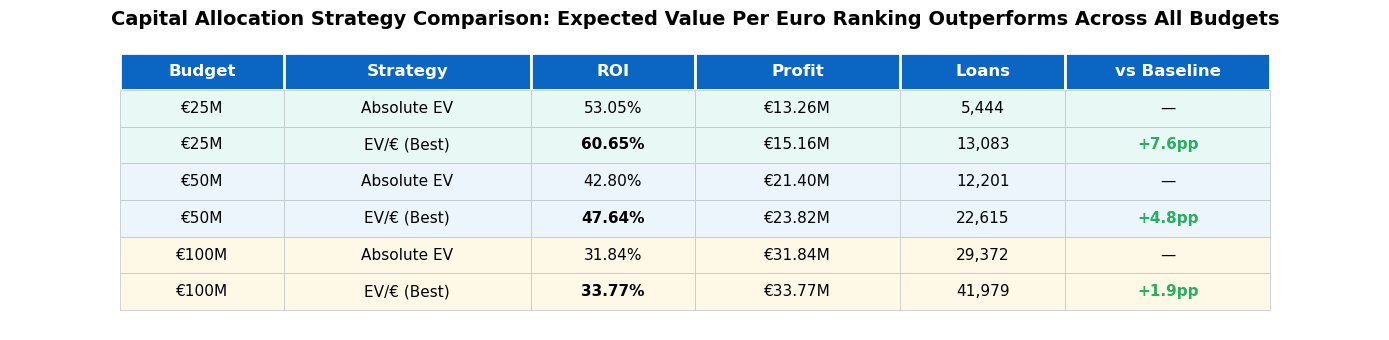

In [72]:
# Comparison data
comparison_data = [
    {'Budget': '€25M', 'Strategy': 'Absolute EV', 'ROI': '53.05%', 'Profit': '€13.26M', 'Loans': '5,444', 'vs Baseline': '—'},
    {'Budget': '€25M', 'Strategy': 'EV/€ (Best)', 'ROI': '60.65%', 'Profit': '€15.16M', 'Loans': '13,083', 'vs Baseline': '+7.6pp'},
    {'Budget': '€50M', 'Strategy': 'Absolute EV', 'ROI': '42.80%', 'Profit': '€21.40M', 'Loans': '12,201', 'vs Baseline': '—'},
    {'Budget': '€50M', 'Strategy': 'EV/€ (Best)', 'ROI': '47.64%', 'Profit': '€23.82M', 'Loans': '22,615', 'vs Baseline': '+4.8pp'},
    {'Budget': '€100M', 'Strategy': 'Absolute EV', 'ROI': '31.84%', 'Profit': '€31.84M', 'Loans': '29,372', 'vs Baseline': '—'},
    {'Budget': '€100M', 'Strategy': 'EV/€ (Best)', 'ROI': '33.77%', 'Profit': '€33.77M', 'Loans': '41,979', 'vs Baseline': '+1.9pp'},
]

df = pd.DataFrame(comparison_data)

# Create figure
fig, ax = plt.subplots(figsize=(14, 3.5))
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=df.values,
                colLabels=df.columns,
                cellLoc='center',
                loc='center',
                colWidths=[0.12, 0.18, 0.12, 0.15, 0.12, 0.15])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)  # Make rows taller for readability

# Style header row
for i in range(len(df.columns)):
    cell = table[(0, i)]
    cell.set_facecolor('#0A66C2') #('#4472C4') ('#2C3E50')
    cell.set_text_props(weight='bold', color='white', fontsize=12)
    cell.set_edgecolor('white')
    cell.set_linewidth(2)

# Style data rows with grouping
colors = {
    '€25M': '#E8F8F5',  # Light green tint
    '€50M': '#EBF5FB',  # Light blue tint  
    '€100M': '#FEF9E7'  # Light yellow tint
}

for i in range(1, len(df) + 1):
    budget = df.iloc[i-1]['Budget']
    strategy = df.iloc[i-1]['Strategy']
    
    for j in range(len(df.columns)):
        cell = table[(i, j)]
        cell.set_edgecolor('#BDC3C7')
        cell.set_linewidth(0.5)
        
        # Color by budget group
        cell.set_facecolor(colors[budget])
        
        # Bold the "EV/€ (Best)" rows and improvement column
        if 'Best' in strategy:
            if j in [2, 5]:  # ROI and vs Baseline columns
                cell.set_text_props(weight='bold', fontsize=11)
        
        # Color the improvement values
        if j == 5 and '+' in str(df.iloc[i-1]['vs Baseline']):
            cell.set_text_props(weight='bold', color='#27AE60', fontsize=11)  # Green for improvements

# Title
plt.title('Capital Allocation Strategy Comparison: Expected Value Per Euro Ranking Outperforms Across All Budgets', 
         fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('comparison_table.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

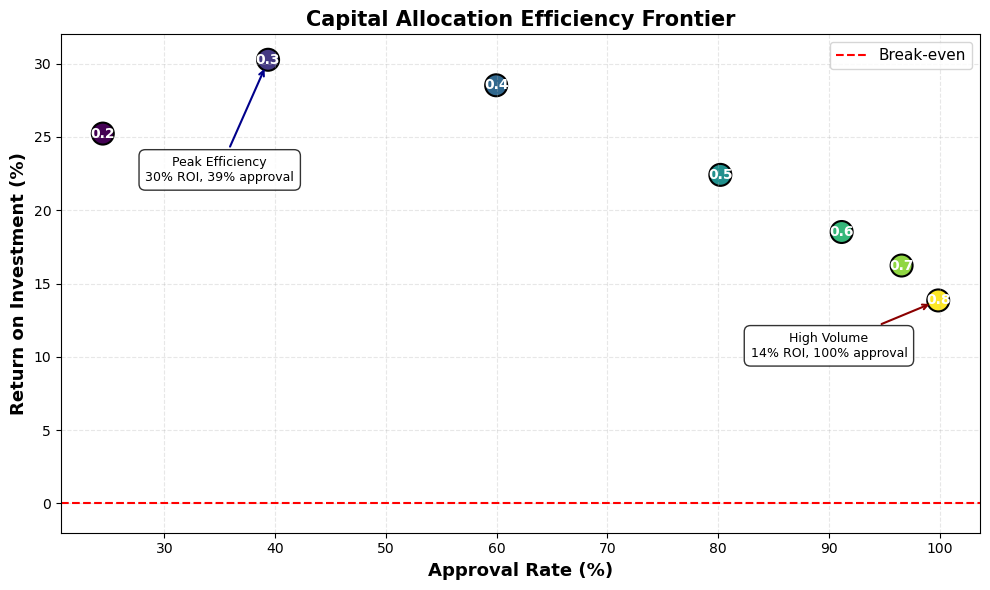

In [68]:
# Enhanced version with annotations
fig, ax = plt.subplots(figsize=(10, 6))

# Plot points
scatter = ax.scatter(portfolio_df['Approval Rate (%)'], portfolio_df['ROI (%)'], 
                     s=250, c=portfolio_df['Threshold'], cmap='viridis', 
                     edgecolor='black', linewidth=1.5)

# Add threshold labels on points
for idx, row in portfolio_df.iterrows():
    ax.annotate(f"{row['Threshold']:.1f}", 
               (row['Approval Rate (%)'], row['ROI (%)']),
               fontsize=10, ha='center', va='center', 
               fontweight='bold', color='white')

# Add key insight annotations (optional - only if space allows)
# Annotate the two extremes
ax.annotate('Peak Efficiency\n30% ROI, 39% approval', 
           xy=(39.4, 30.26), xytext=(35, 22),
           fontsize=9, ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8),
           arrowprops=dict(arrowstyle='->', lw=1.5, color='darkblue', shrinkB=7))

ax.annotate('High Volume\n14% ROI, 100% approval', 
           xy=(99.9, 13.85), xytext=(90, 10),
           fontsize=9, ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8),
           arrowprops=dict(arrowstyle='->', lw=1.5, color='darkred', shrinkB=7))

# Labels and styling
ax.set_xlabel('Approval Rate (%)', fontsize=13, fontweight='bold')
ax.set_ylabel('Return on Investment (%)', fontsize=13, fontweight='bold')
ax.set_title('Capital Allocation Efficiency Frontier', fontsize=15, fontweight='bold')
ax.grid(alpha=0.3, linestyle='--')  # Lighter grid
ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Break-even')
ax.legend(fontsize=11, loc='upper right')

# Set y-axis to start slightly below 0 for context
ax.set_ylim(-2, 32)

plt.tight_layout()
# Save high-res for 1-pager
plt.savefig('efficiency_frontier.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

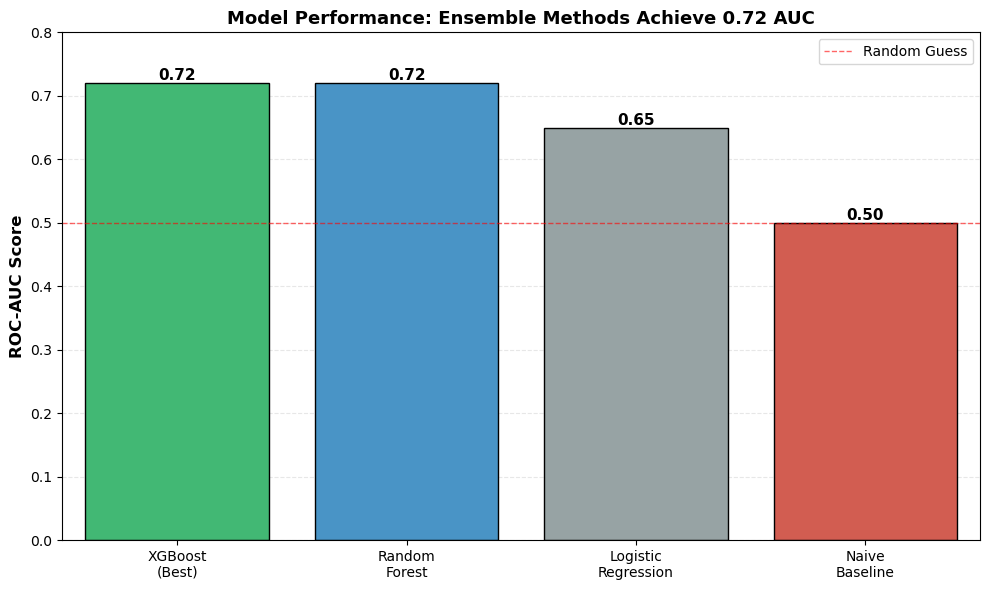

In [69]:
# Data
df = pd.DataFrame ({
    'Model': ['XGBoost\n(Best)', 'Random\nForest', 'Logistic\nRegression', 'Naive\nBaseline'],
    'ROC-AUC': [0.72, 0.72, 0.65, 0.50]
})

# Custom color palette
palette = ['#2ECC71', '#3498DB', '#95A5A6', '#E74C3C']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Model', y='ROC-AUC', palette=palette, edgecolor='black')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=11, fontweight='bold')

# Styling
ax.set_xlabel('')
ax.set_ylabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance: Ensemble Methods Achieve 0.72 AUC', fontsize=13, fontweight='bold')
ax.set_ylim(0, 0.8)

# Reference line
ax.axhline(y=0.5,color='red', linestyle='--', linewidth=1, alpha=0.6, label='Random Guess')

ax.grid(axis='y', ls='--', alpha=0.3)
ax.set_axisbelow(True)
ax.legend()

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()